In [1]:
%load_ext autoreload
%autoreload 2

In [142]:
import os
token = "y396X7OKLE55x56Bz+1l/G7AnIR1zZELJkYfsN5tjqQGXpmiD0J54IAApraILJRA"
os.environ["IQM_TOKEN"] = token
#backend = "garnet"
#backend = "fakeapollo"

from iqm.qiskit_iqm.iqm_provider import IQMProvider
#iqm_url="https://cocos.resonance.meetiqm.com/emerald-fe33b793-44a0-42d6"
iqm_url="https://cocos.resonance.meetiqm.com/garnet"
provider = IQMProvider(iqm_url)
backend = provider.get_backend()

In [163]:
from rustworkx.visualization import mpl_draw
import matplotlib.pyplot as plt
import rustworkx as rx
# Defining the Qubit positions consistently with the chip layout
idx_to_qb_number = dict((v,int(k[2:])) for k,v in backend._qb_to_idx.items())
pos = {"garnet":
           {
   0: (4,0), 1: (3,0),
   2: (5,1), 3: (4,1), 4: (3,1), 5: (2,1), 6: (1,1),
   7: (5,2), 8: (4,2), 9: (3,2), 10: (2,2), 11: (1,2),
   12: (5,3), 13: (4,3), 14: (3,3), 15: (2,3), 16: (1,3),
   17: (4,4), 18: (3,4), 19: (2,4)
},
           "emerald":
           {
    1: (10, 10), 2: (11, 9),
    3: (7, 11), 4: (8, 10), 5: (9, 9), 6: (10, 8), 7: (11, 7),
    8: (5, 11), 9: (6, 10), 10: (7, 9), 11: (8, 8), 12: (9, 7), 13: (10, 6), 14: (11, 5),
    15: (3, 11), 16: (4, 10), 17: (5, 9), 18: (6, 8), 19: (7, 7), 20: (8, 6), 21: (9, 5), 22: (10, 4),
    23: (2, 10), 24: (3, 9), 25: (4, 8), 26: (5, 7), 27: (6, 6), 28: (7, 5), 29: (8, 4), 30: (9, 3), 31: (10, 2),
    32: (2, 8), 33: (3, 7), 34: (4, 6), 35: (5, 5), 36: (6, 4), 37: (7, 3), 38: (8, 2), 39: (9, 1),
    40: (1, 7), 41: (2, 6), 42: (3, 5), 43: (4, 4), 44: (5, 3), 45: (6, 2), 46: (7, 1),
    47: (1, 5), 48: (2, 4), 49: (3, 3), 50: (4, 2), 51: (5, 1),
    52: (1, 3), 53: (2, 2), 54: (3, 1),
           }
}
pos["emerald"] = {i: pos["emerald"][idx_to_qb_number[i]] for i in range(49)}

plt.rcParams['figure.dpi'] = 70
backend_graph = backend.coupling_map.graph.to_undirected(multigraph=False)

disjoint_1 = [[2,3],[4,9],[10,11],[15,16],[14,18],[13,17],[7,12]]
disjoint_2 = [[3,4],[9,10],[11,16],[14,15],[17,18],[12,13],[2,7]]
mpl_draw(backend_graph,
         node_list = list(backend_graph.node_indices()),
         #arrows=False,
         with_labels=True,
         #node_color=[greedy_nodes[node] for node in backend_graph.node_indices()],
         node_color='k',
         font_color='w',
         # edge_list=list(backend_graph.edge_list()),
         # edge_color=list({e: 'r' if e in [(0,1),(0,4)] else 'k' for e in list(backend_graph.edge_list())}.values()),
         # edge_list=disjoint_2,
         # edge_color=['b']*len(disjoint_2),
         width=3.0,
         pos=pos["garnet"]
        )

KeyError: 20

In [24]:
from iqm.benchmarks.randomized_benchmarking.direct_rb.direct_rb import *

In [26]:
DRB_TEST = {}
for idx, disjoint in enumerate([disjoint_1,disjoint_2]):
    DRB_TEST[f"disjoint_{idx}"] = DirectRBConfiguration(
        qubits_array=disjoint,
        eplg=True,
        depths=sorted(list(set(np.geomspace(1, 250, num=10, endpoint=True, dtype=int).tolist()))),
        num_circuit_samples=25,
        shots=2**8,
    )

In [27]:
benchmark_direct_rb = {}
run_direct_rb = {}
for idx, disjoint in enumerate([disjoint_1,disjoint_2]):
    print(f"\n\t***** Now on disjoint layer {idx} *****\n")
    benchmark_direct_rb[f"disjoint_{idx}"] = DirectRandomizedBenchmarking(backend, DRB_TEST[f"disjoint_{idx}"])
    run_direct_rb[f"disjoint_{idx}"] = benchmark_direct_rb[f"disjoint_{idx}"].run()

2025-02-05 21:17:15,918 - iqm.benchmarks.logging_config - INFO - Executing parallel Direct RB on qubits [[2, 3], [4, 9], [10, 11], [15, 16], [14, 18], [13, 17], [7, 12]]. Will generate and submit all 25 DRB circuits for each depth [1, 3, 6, 11, 21, 39, 73, 135, 250]
2025-02-05 21:17:15,919 - iqm.benchmarks.logging_config - INFO - Depth 1



	***** Now on disjoint layer 0 *****



2025-02-05 21:17:21,054 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [2, 3, 4, 9, 10, 11, 15, 16, 14, 18, 13, 17, 7, 12]
C:\Users\PedroFigueroaRomero\AppData\Roaming\Python\Python311\site-packages\iqm\qiskit_iqm\iqm_provider.py:170: UserWarning: Unknown backend option(s): {'calibration_set_id'}
  warnings.warn(f'Unknown backend option(s): {unknown_options}')
2025-02-05 21:17:22,078 - iqm.benchmarks.logging_config - INFO - Job for depth 1 submitted successfully!
2025-02-05 21:17:22,079 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-02-05 21:17:25,877 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [2, 3, 4, 9, 10, 11, 15, 16, 14, 18, 13, 17, 7, 12]
2025-02-05 21:17:26,842 - iqm.benchmarks.logging_config - INFO - Job for depth 3 submitted successfully!
2025-02-05 21:17:26,843 - iqm.benchmarks.logging_config - INFO - Depth 6
2025-02-05 21:17:31,586 - iqm.benchmarks.logging_confi


	***** Now on disjoint layer 1 *****



2025-02-05 21:23:31,571 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [3, 4, 9, 10, 11, 16, 14, 15, 17, 18, 12, 13, 2, 7]
C:\Users\PedroFigueroaRomero\AppData\Roaming\Python\Python311\site-packages\iqm\qiskit_iqm\iqm_provider.py:170: UserWarning: Unknown backend option(s): {'calibration_set_id'}
  warnings.warn(f'Unknown backend option(s): {unknown_options}')
2025-02-05 21:23:32,358 - iqm.benchmarks.logging_config - INFO - Job for depth 1 submitted successfully!
2025-02-05 21:23:32,358 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-02-05 21:23:35,264 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [3, 4, 9, 10, 11, 16, 14, 15, 17, 18, 12, 13, 2, 7]
2025-02-05 21:23:36,038 - iqm.benchmarks.logging_config - INFO - Job for depth 3 submitted successfully!
2025-02-05 21:23:36,039 - iqm.benchmarks.logging_config - INFO - Depth 6
2025-02-05 21:23:39,936 - iqm.benchmarks.logging_confi

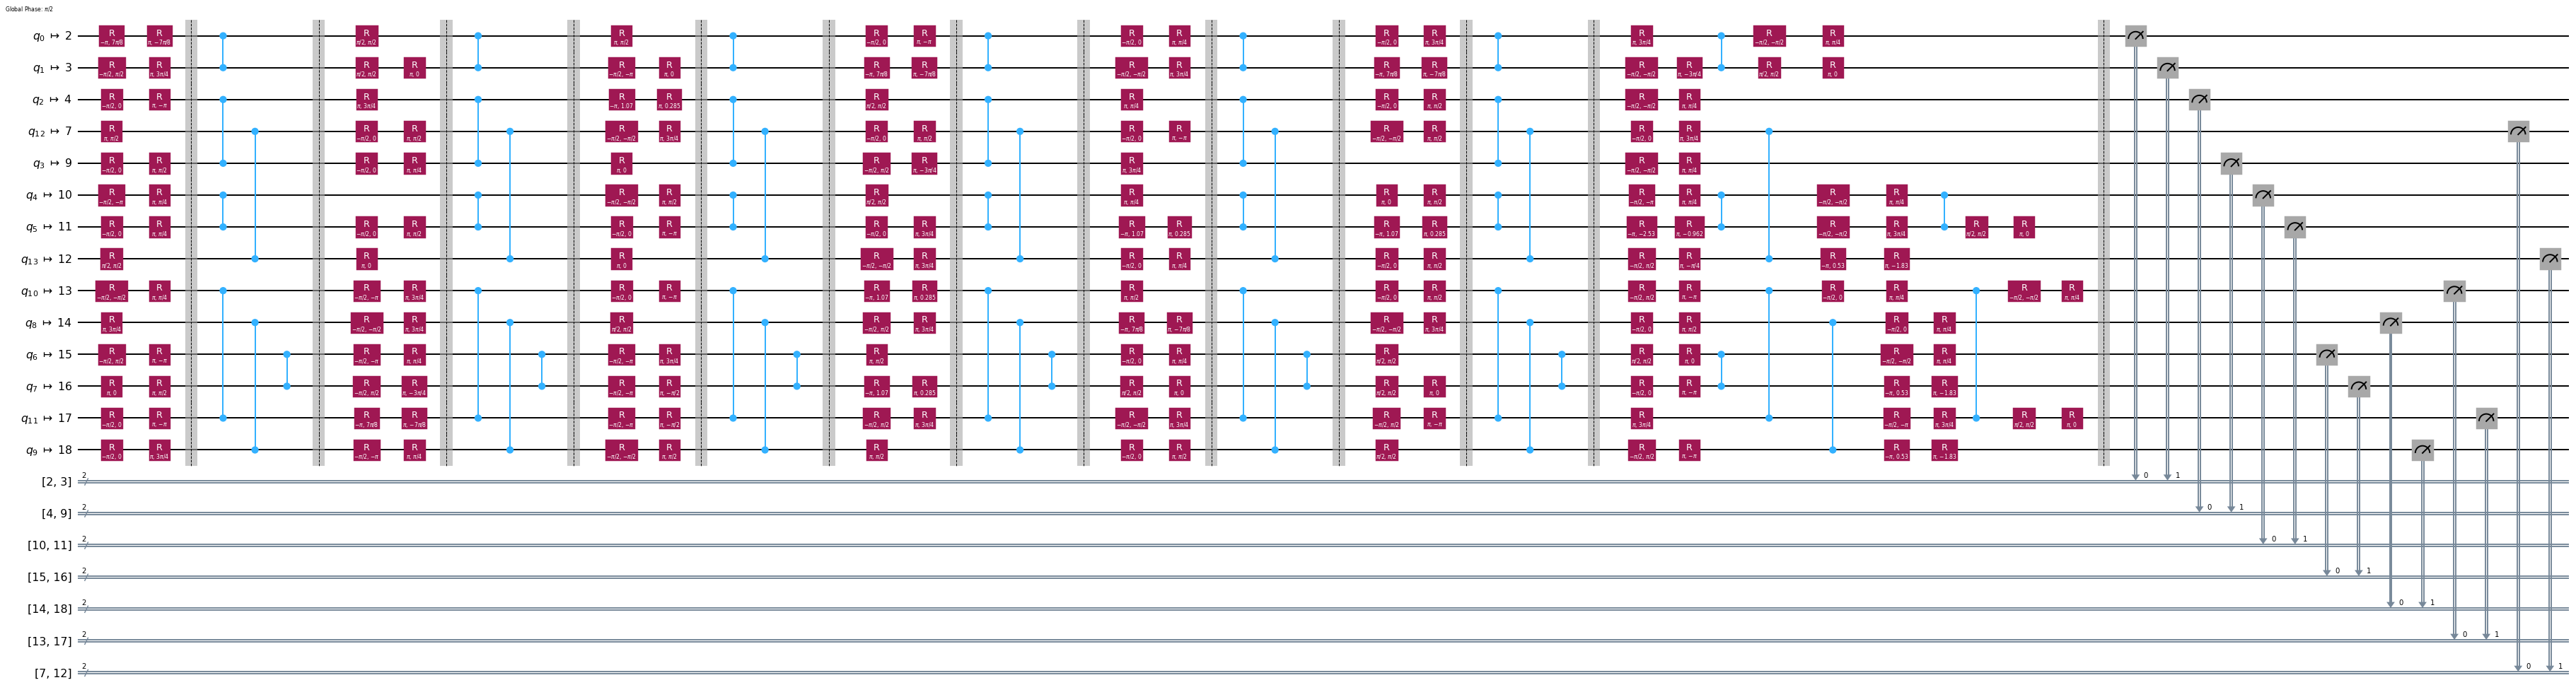

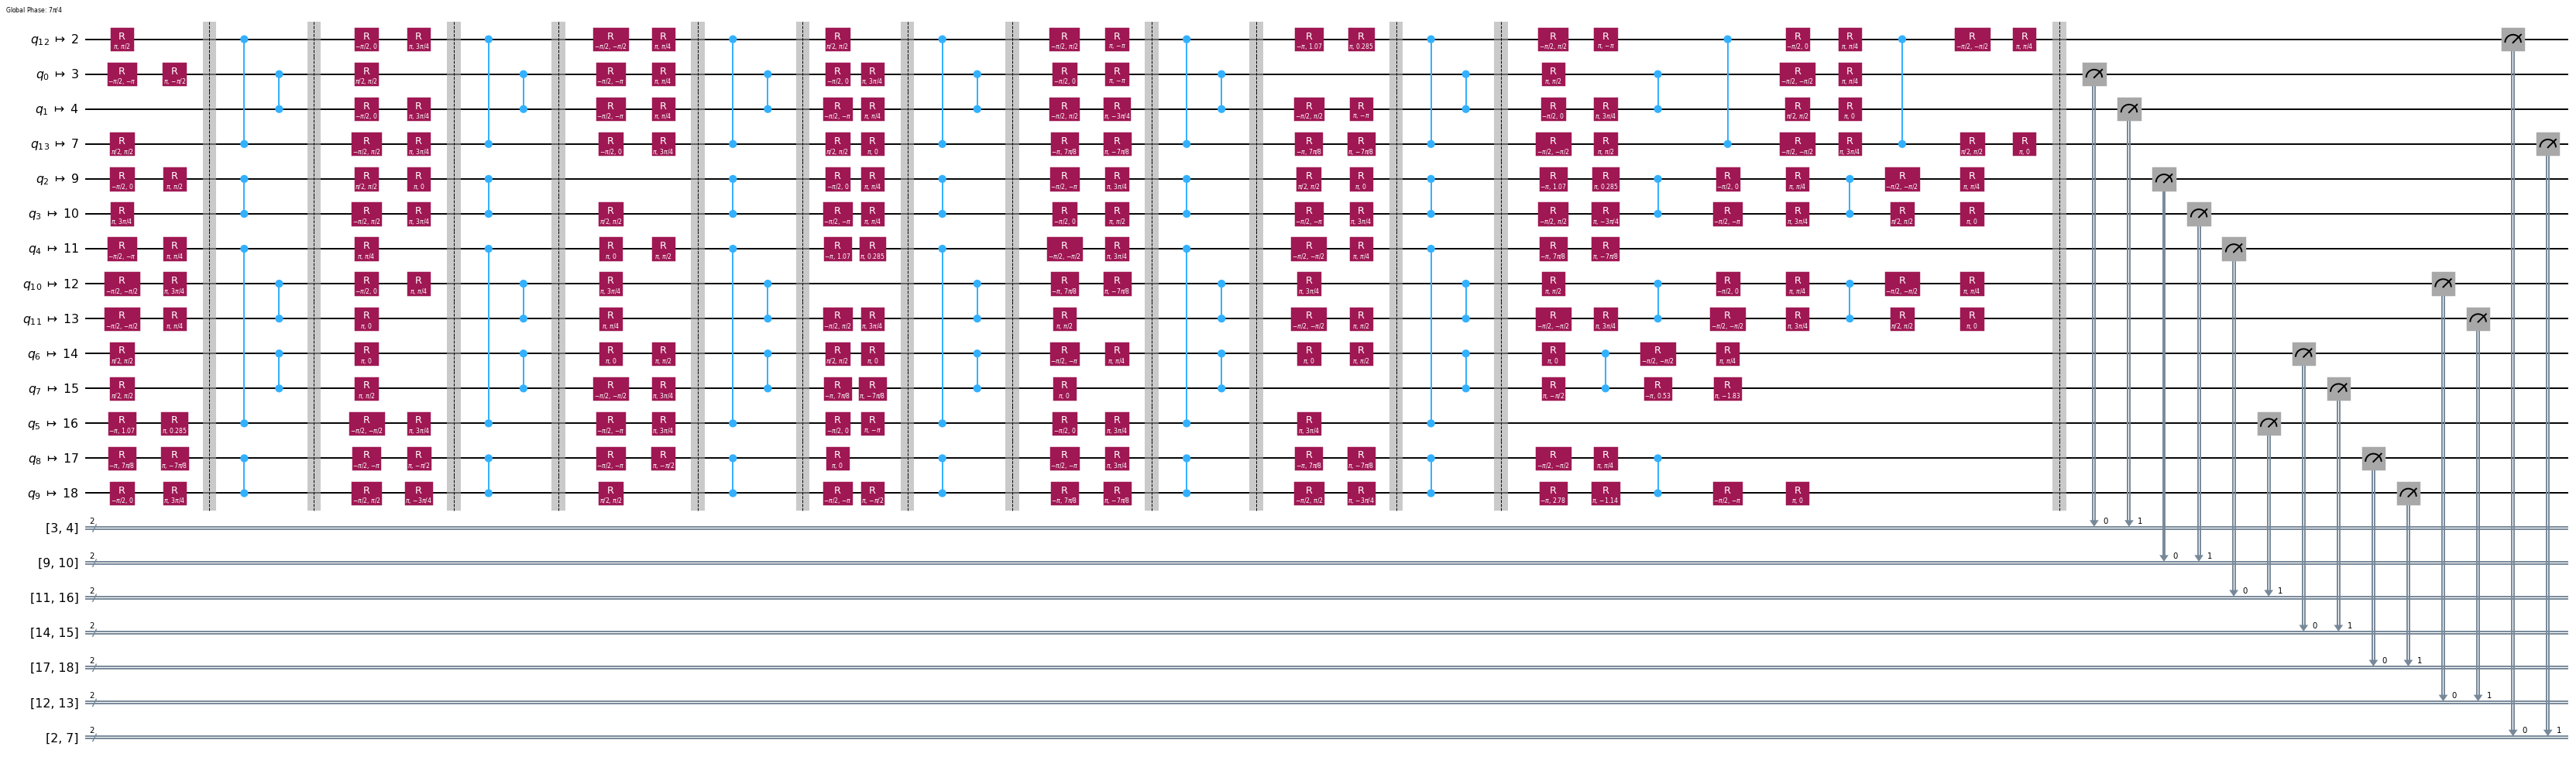

In [37]:
for idx, disjoint in enumerate([disjoint_1, disjoint_2]):
    display(benchmark_direct_rb[f"disjoint_{idx}"].circuits.benchmark_circuits[0].circuit_groups[2].circuits[1].draw(output="mpl",fold=0, idle_wires=False))

In [29]:
result_direct_rb = {}
for idx, disjoint in enumerate([disjoint_1,disjoint_2]):
    result_direct_rb[f"disjoint_{idx}"] = benchmark_direct_rb[f"disjoint_{idx}"].analyze()

2025-02-05 21:29:51,875 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [[2, 3], [4, 9], [10, 11], [15, 16], [14, 18], [13, 17], [7, 12]].
2025-02-05 21:29:51,885 - iqm.benchmarks.logging_config - INFO - Depth 1
2025-02-05 21:29:51,901 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-02-05 21:29:51,921 - iqm.benchmarks.logging_config - INFO - Depth 6
2025-02-05 21:29:51,948 - iqm.benchmarks.logging_config - INFO - Depth 11
2025-02-05 21:29:51,982 - iqm.benchmarks.logging_config - INFO - Depth 21
2025-02-05 21:29:52,033 - iqm.benchmarks.logging_config - INFO - Depth 39
2025-02-05 21:29:52,108 - iqm.benchmarks.logging_config - INFO - Depth 73
2025-02-05 21:29:52,190 - iqm.benchmarks.logging_config - INFO - Depth 135
2025-02-05 21:29:52,270 - iqm.benchmarks.logging_config - INFO - Depth 250
2025-02-05 21:29:52,857 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [[3, 4], [9, 10], [11, 16], [14, 15], [17, 18], 

In [30]:
for idx, disjoint in enumerate([disjoint_1,disjoint_2]):
    fid_product = [1, 0]
    for obs in result_direct_rb[f"disjoint_{idx}"].observations:
        fid_product[0] *= obs.value
        fid_product[1] += obs.uncertainty
        print(f"{obs.identifier.qubit_indices}: {100*obs.value:.2f} +/ {100*obs.uncertainty:.2f} (%)")

    print(f"LF_m = {100*fid_product[0]:.2f} +/- {100*fid_product[1]:.2f}\n")

[2, 3]: 98.22 +/ 0.03 (%)
[4, 9]: 98.05 +/ 0.04 (%)
[10, 11]: 98.00 +/ 0.06 (%)
[15, 16]: 97.54 +/ 0.06 (%)
[14, 18]: 97.84 +/ 0.04 (%)
[13, 17]: 98.43 +/ 0.05 (%)
[7, 12]: 97.75 +/ 0.04 (%)
LF_m = 86.67 +/- 0.33

[3, 4]: 98.41 +/ 0.03 (%)
[9, 10]: 98.28 +/ 0.03 (%)
[11, 16]: 98.48 +/ 0.05 (%)
[14, 15]: 97.92 +/ 0.08 (%)
[17, 18]: 98.47 +/ 0.05 (%)
[12, 13]: 98.37 +/ 0.04 (%)
[2, 7]: 97.78 +/ 0.08 (%)
LF_m = 88.34 +/- 0.35



In [41]:
len(disjoint_1)+len(disjoint_2)

14

In [ ]:
list(result_direct_rb[f"disjoint_{idx}"].dataset.attrs[5]['avg_polarization_nominal_values'].keys())

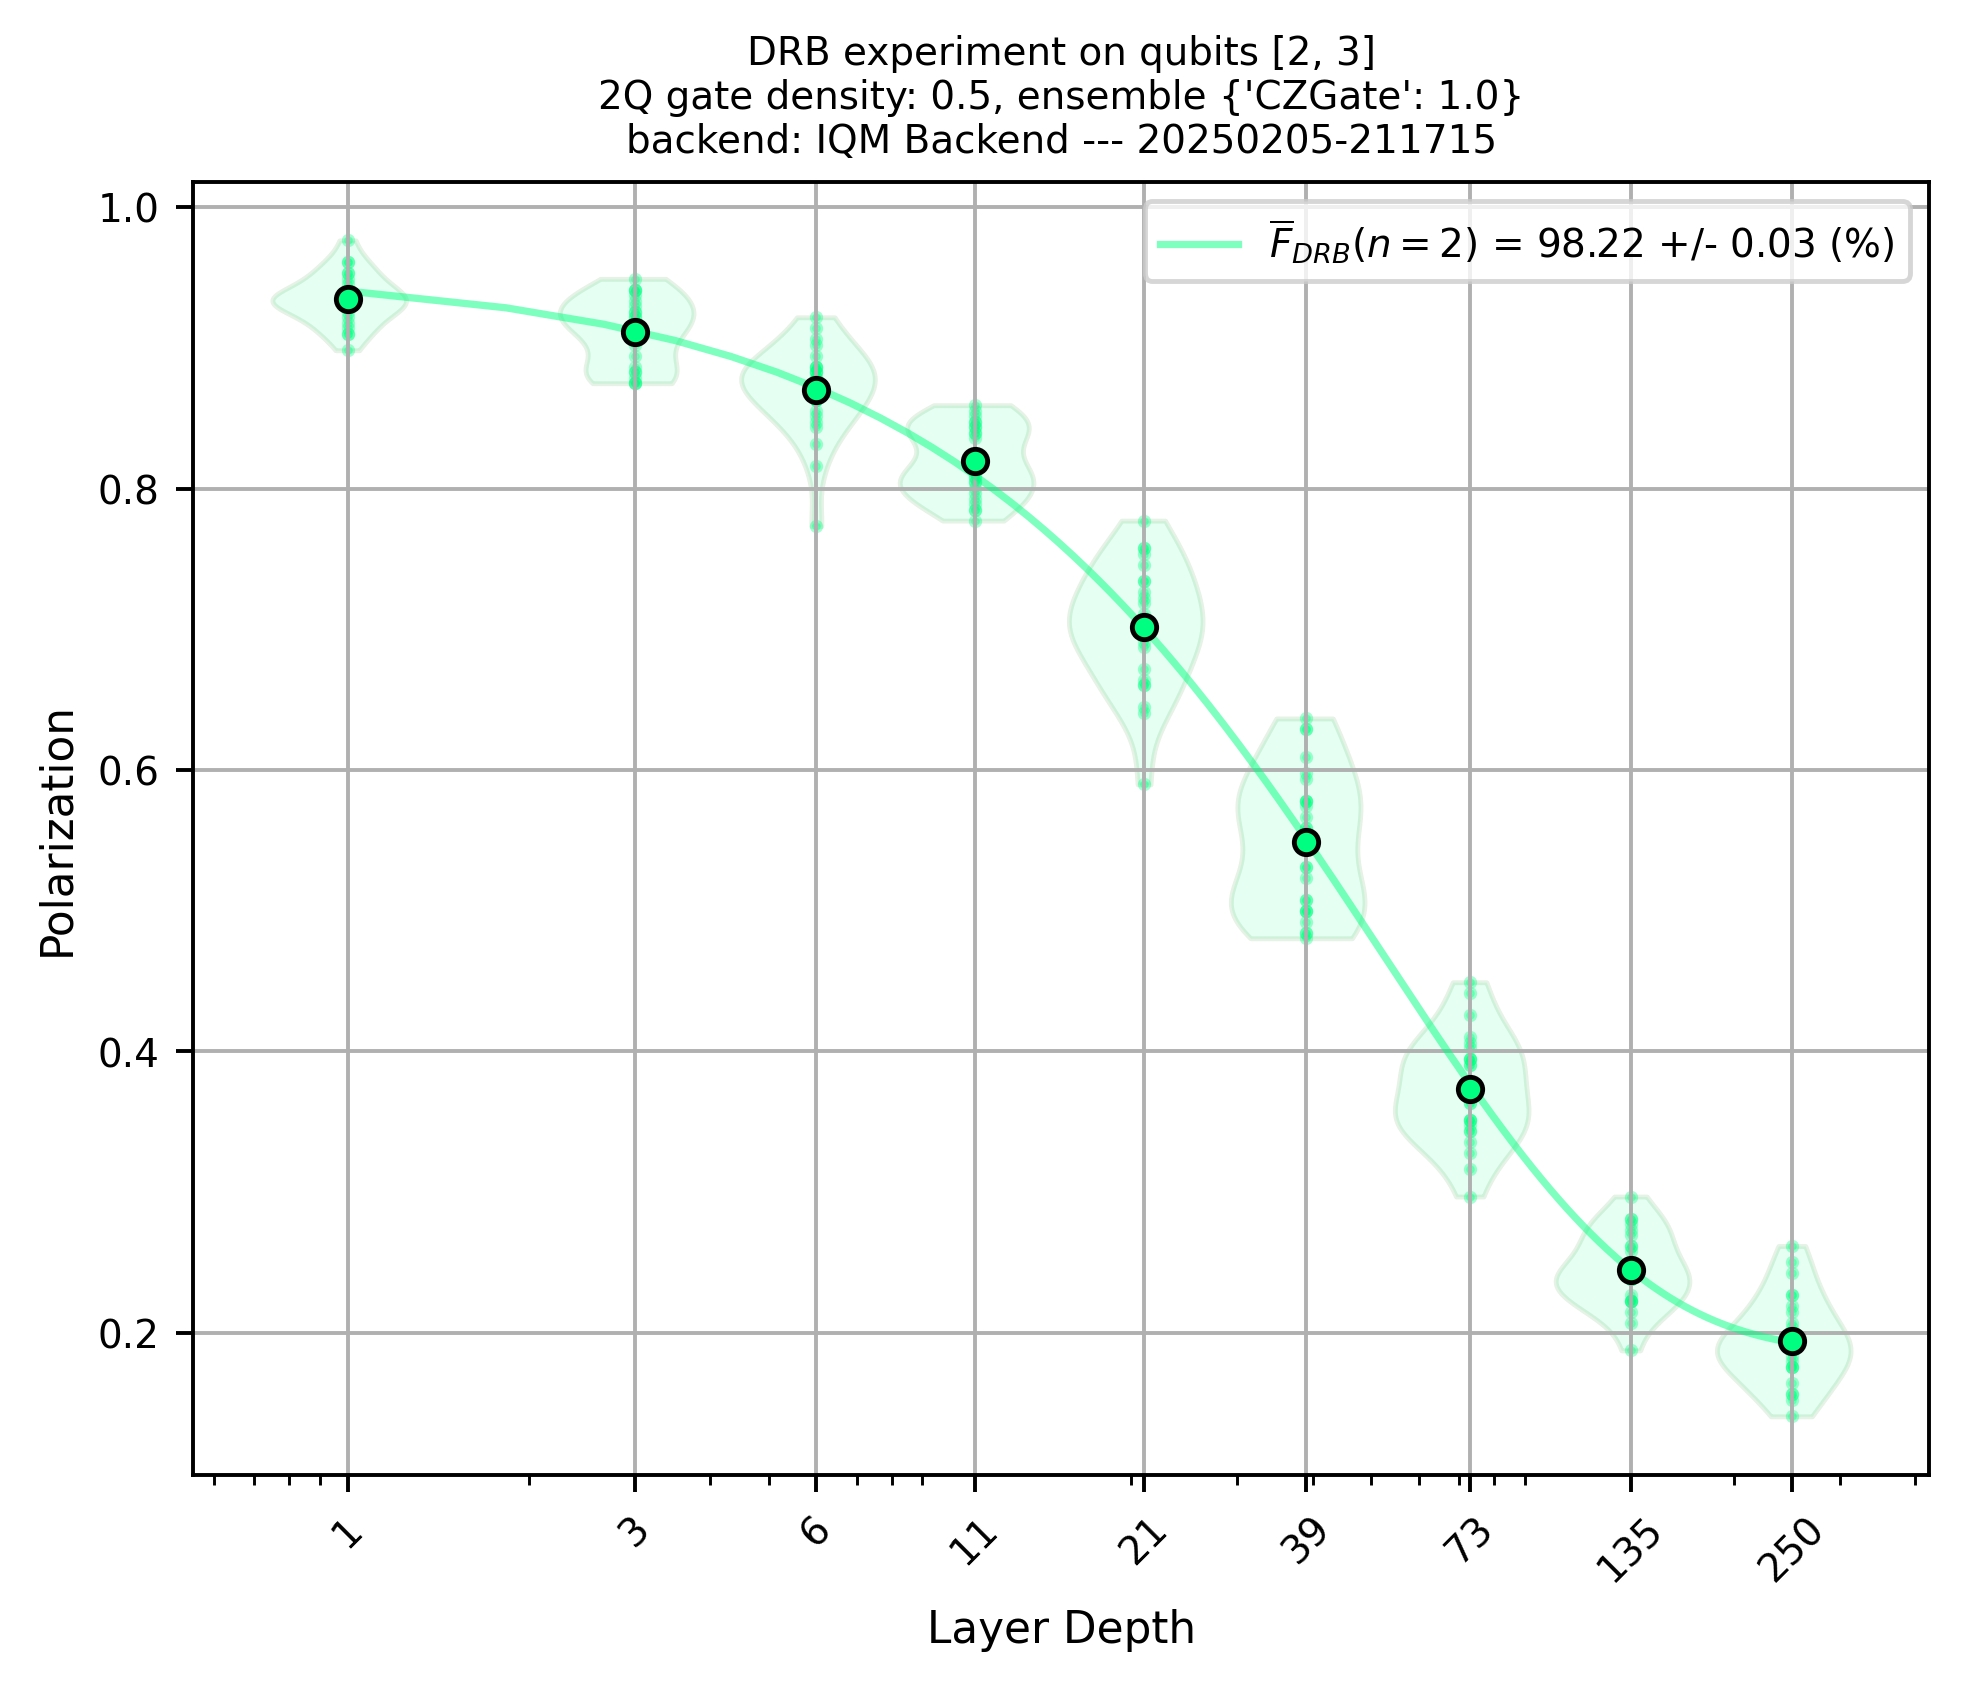

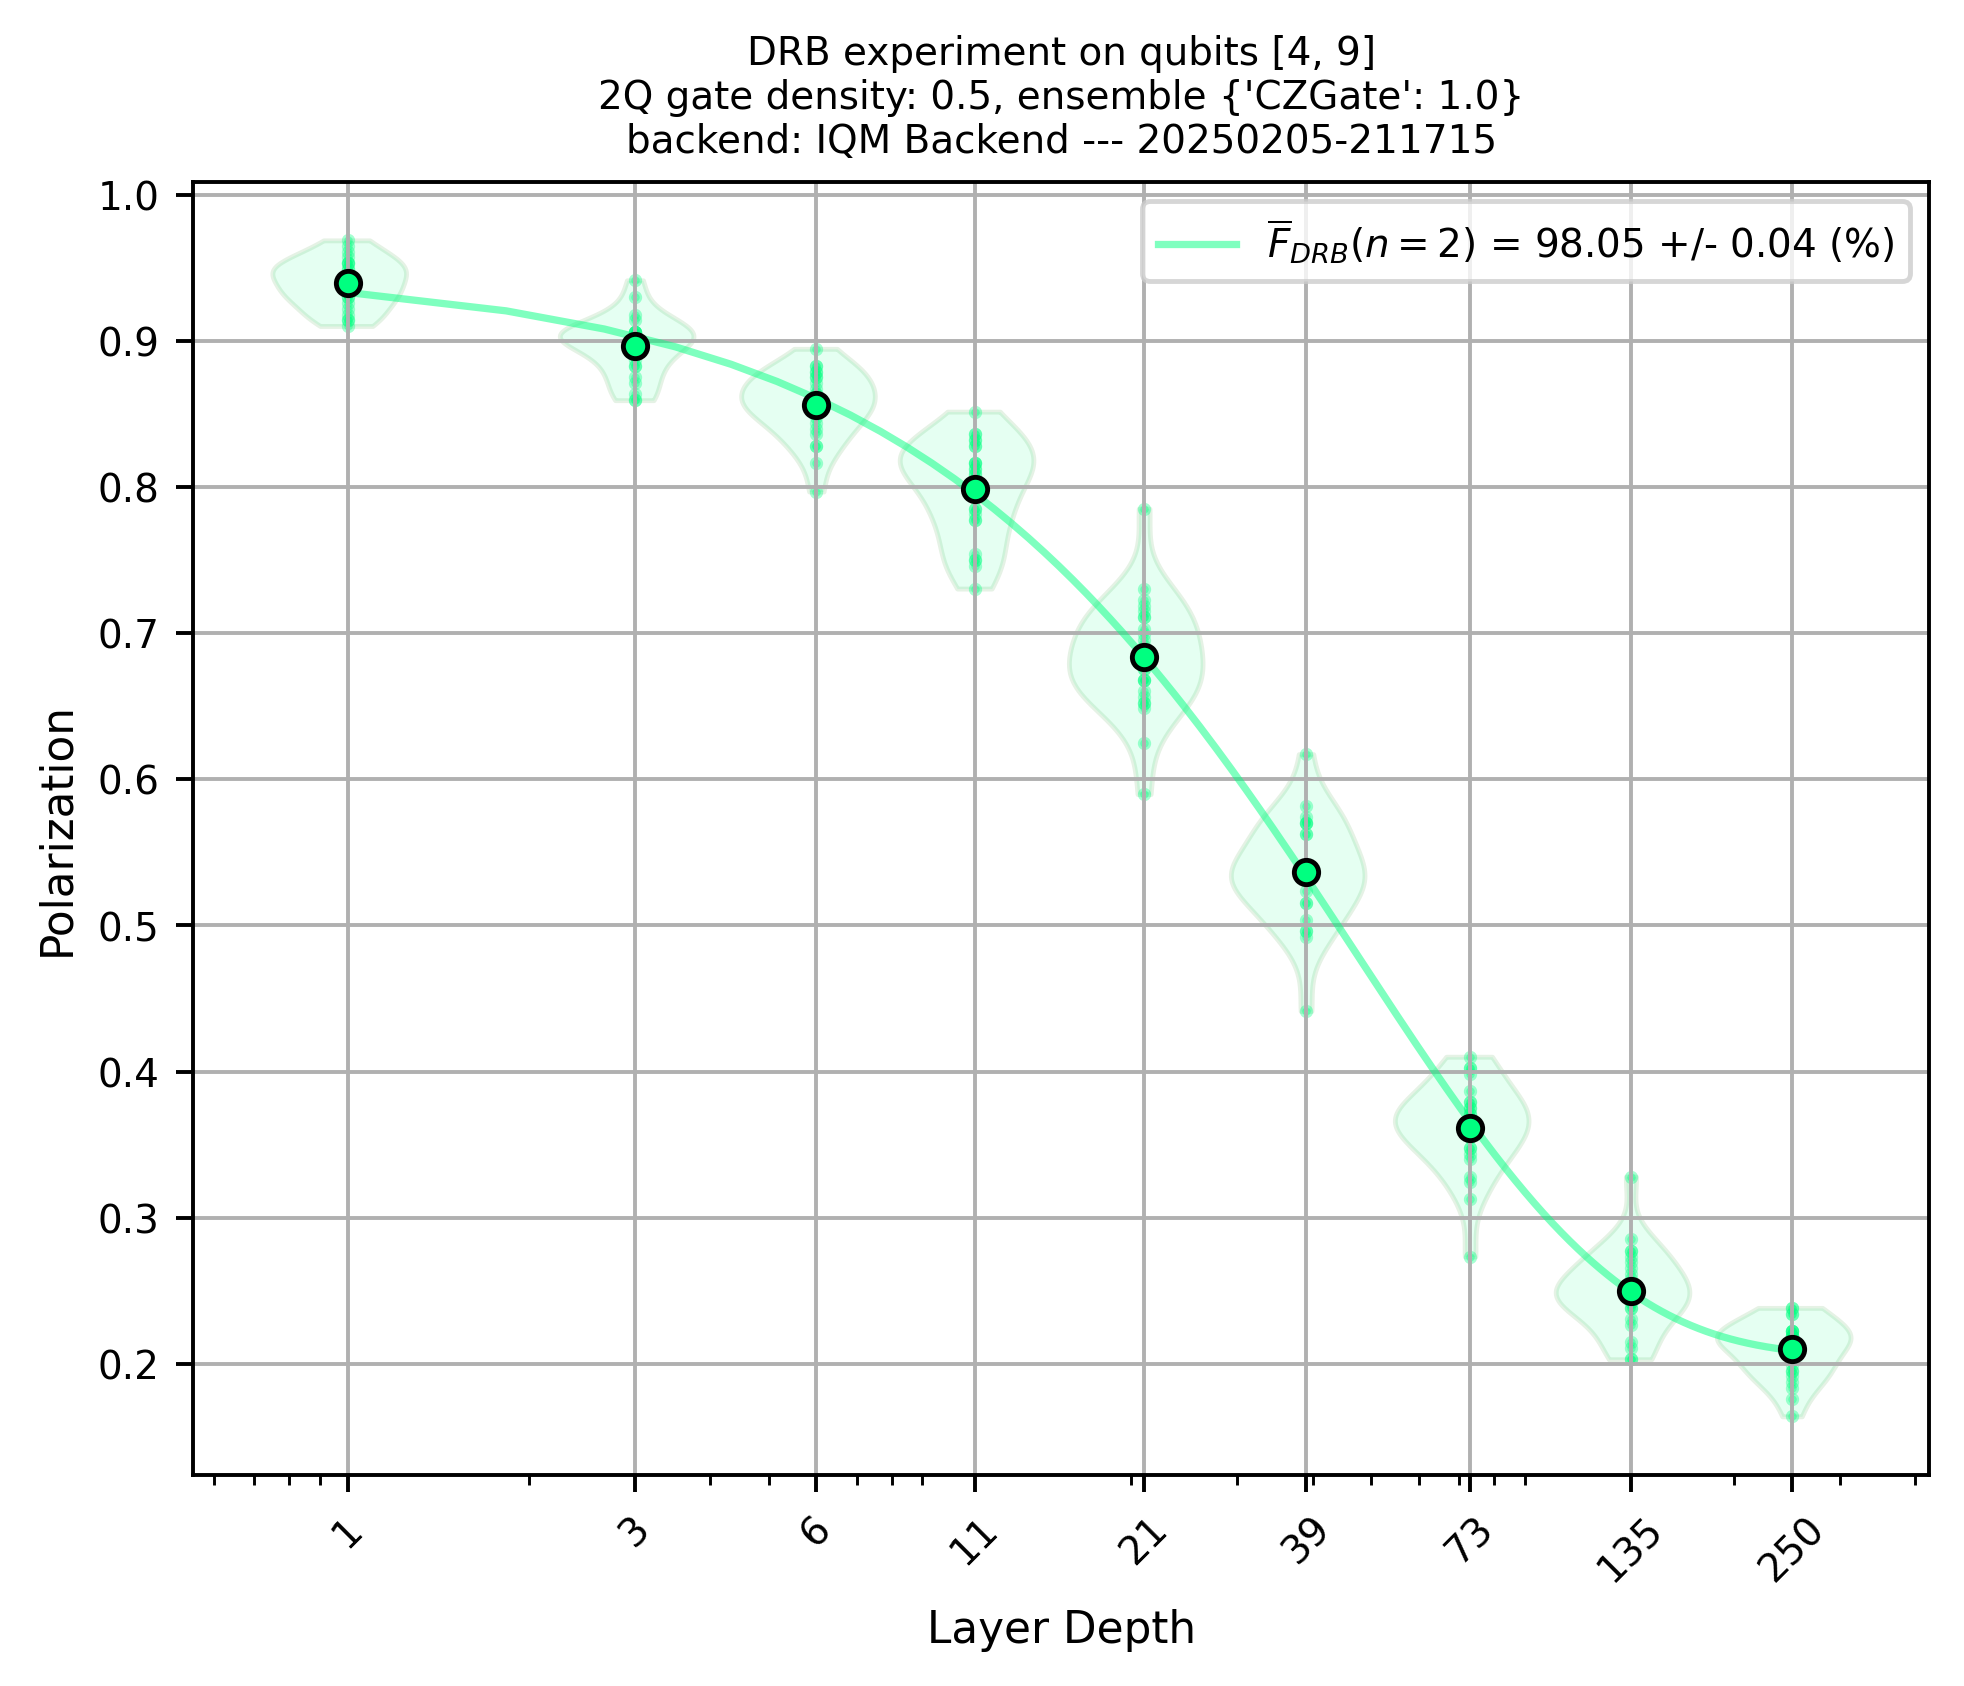

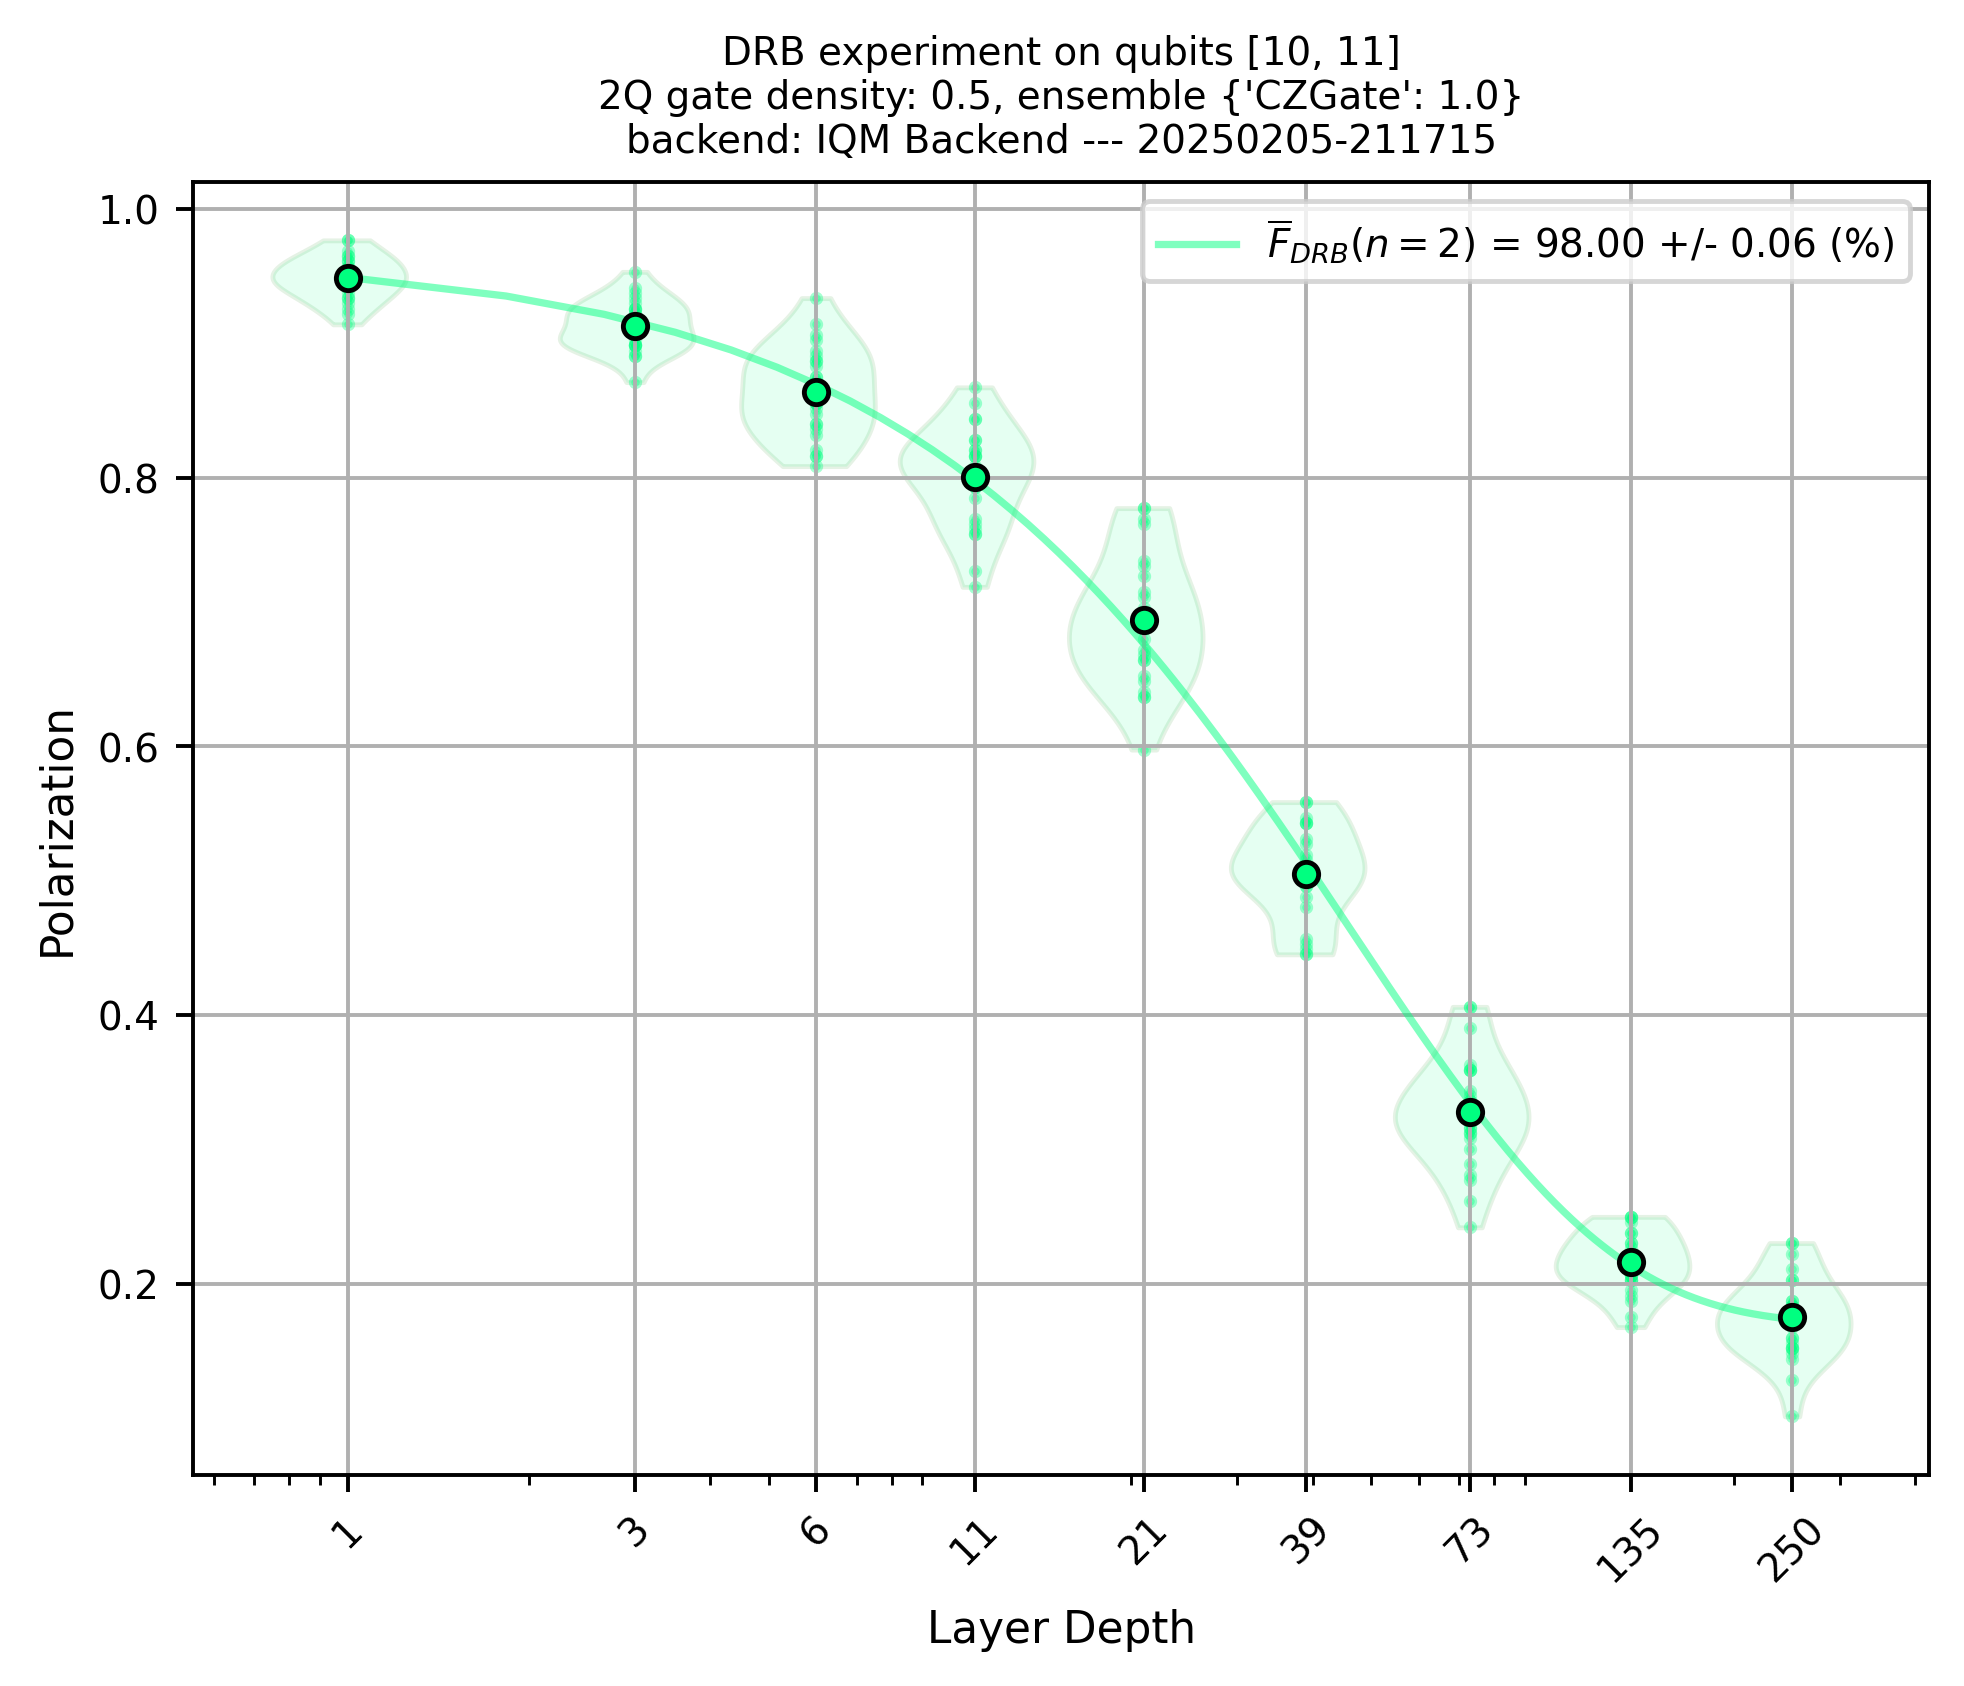

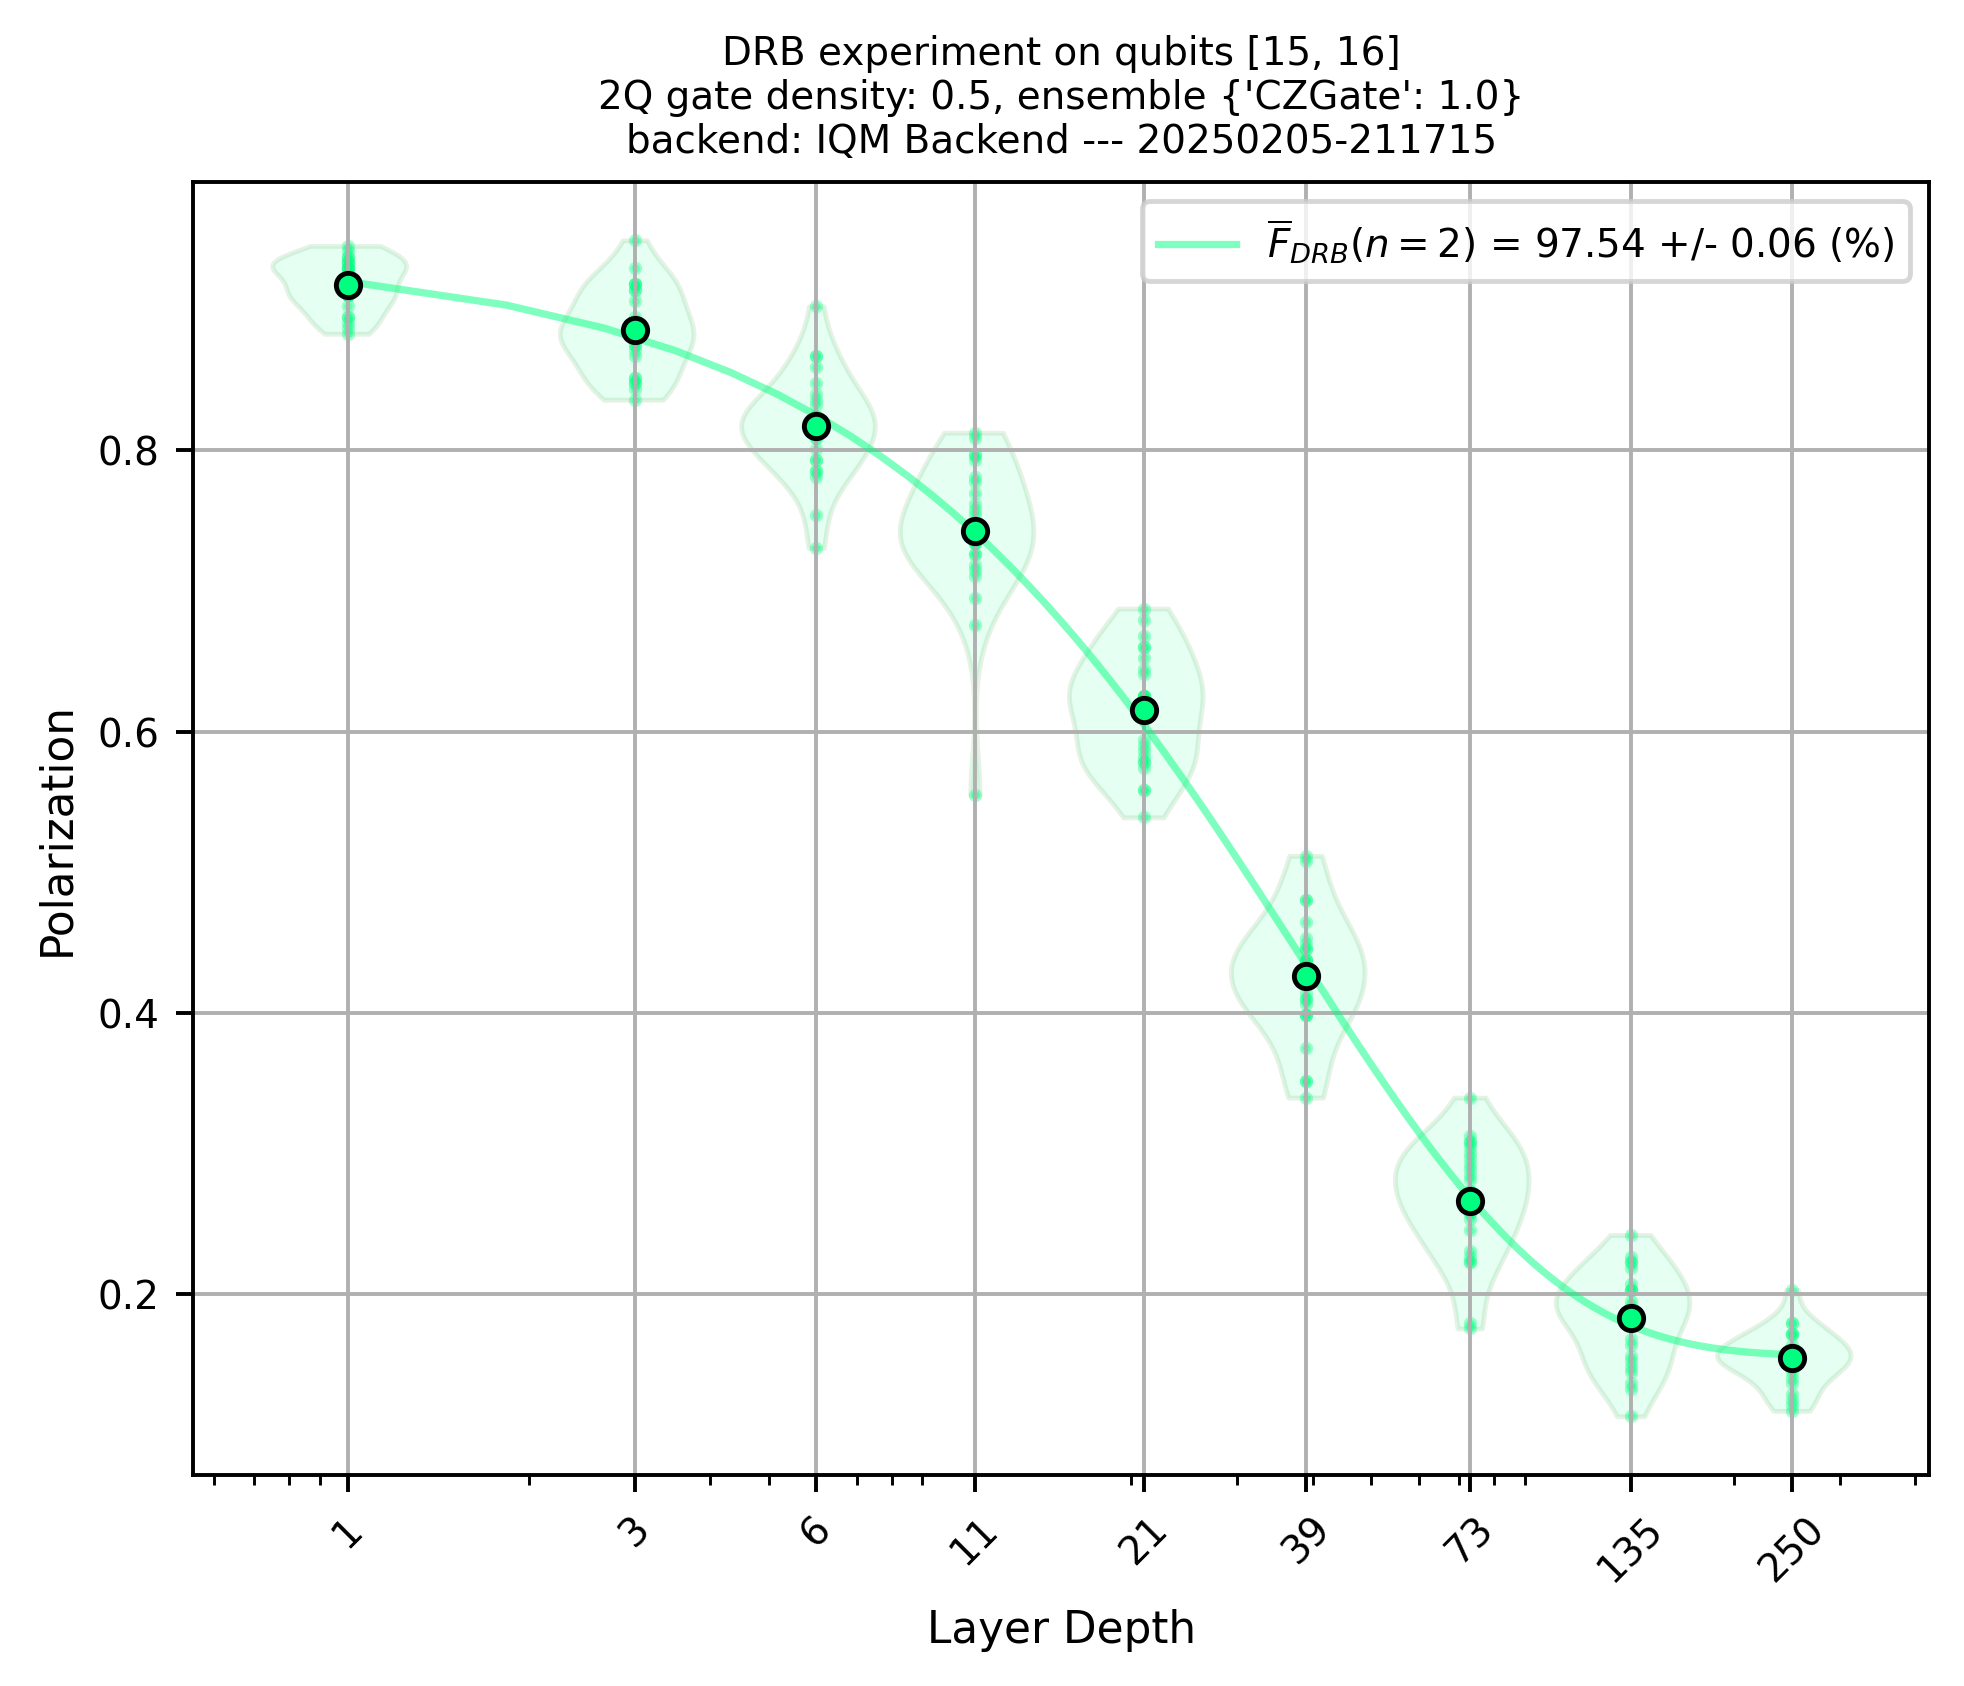

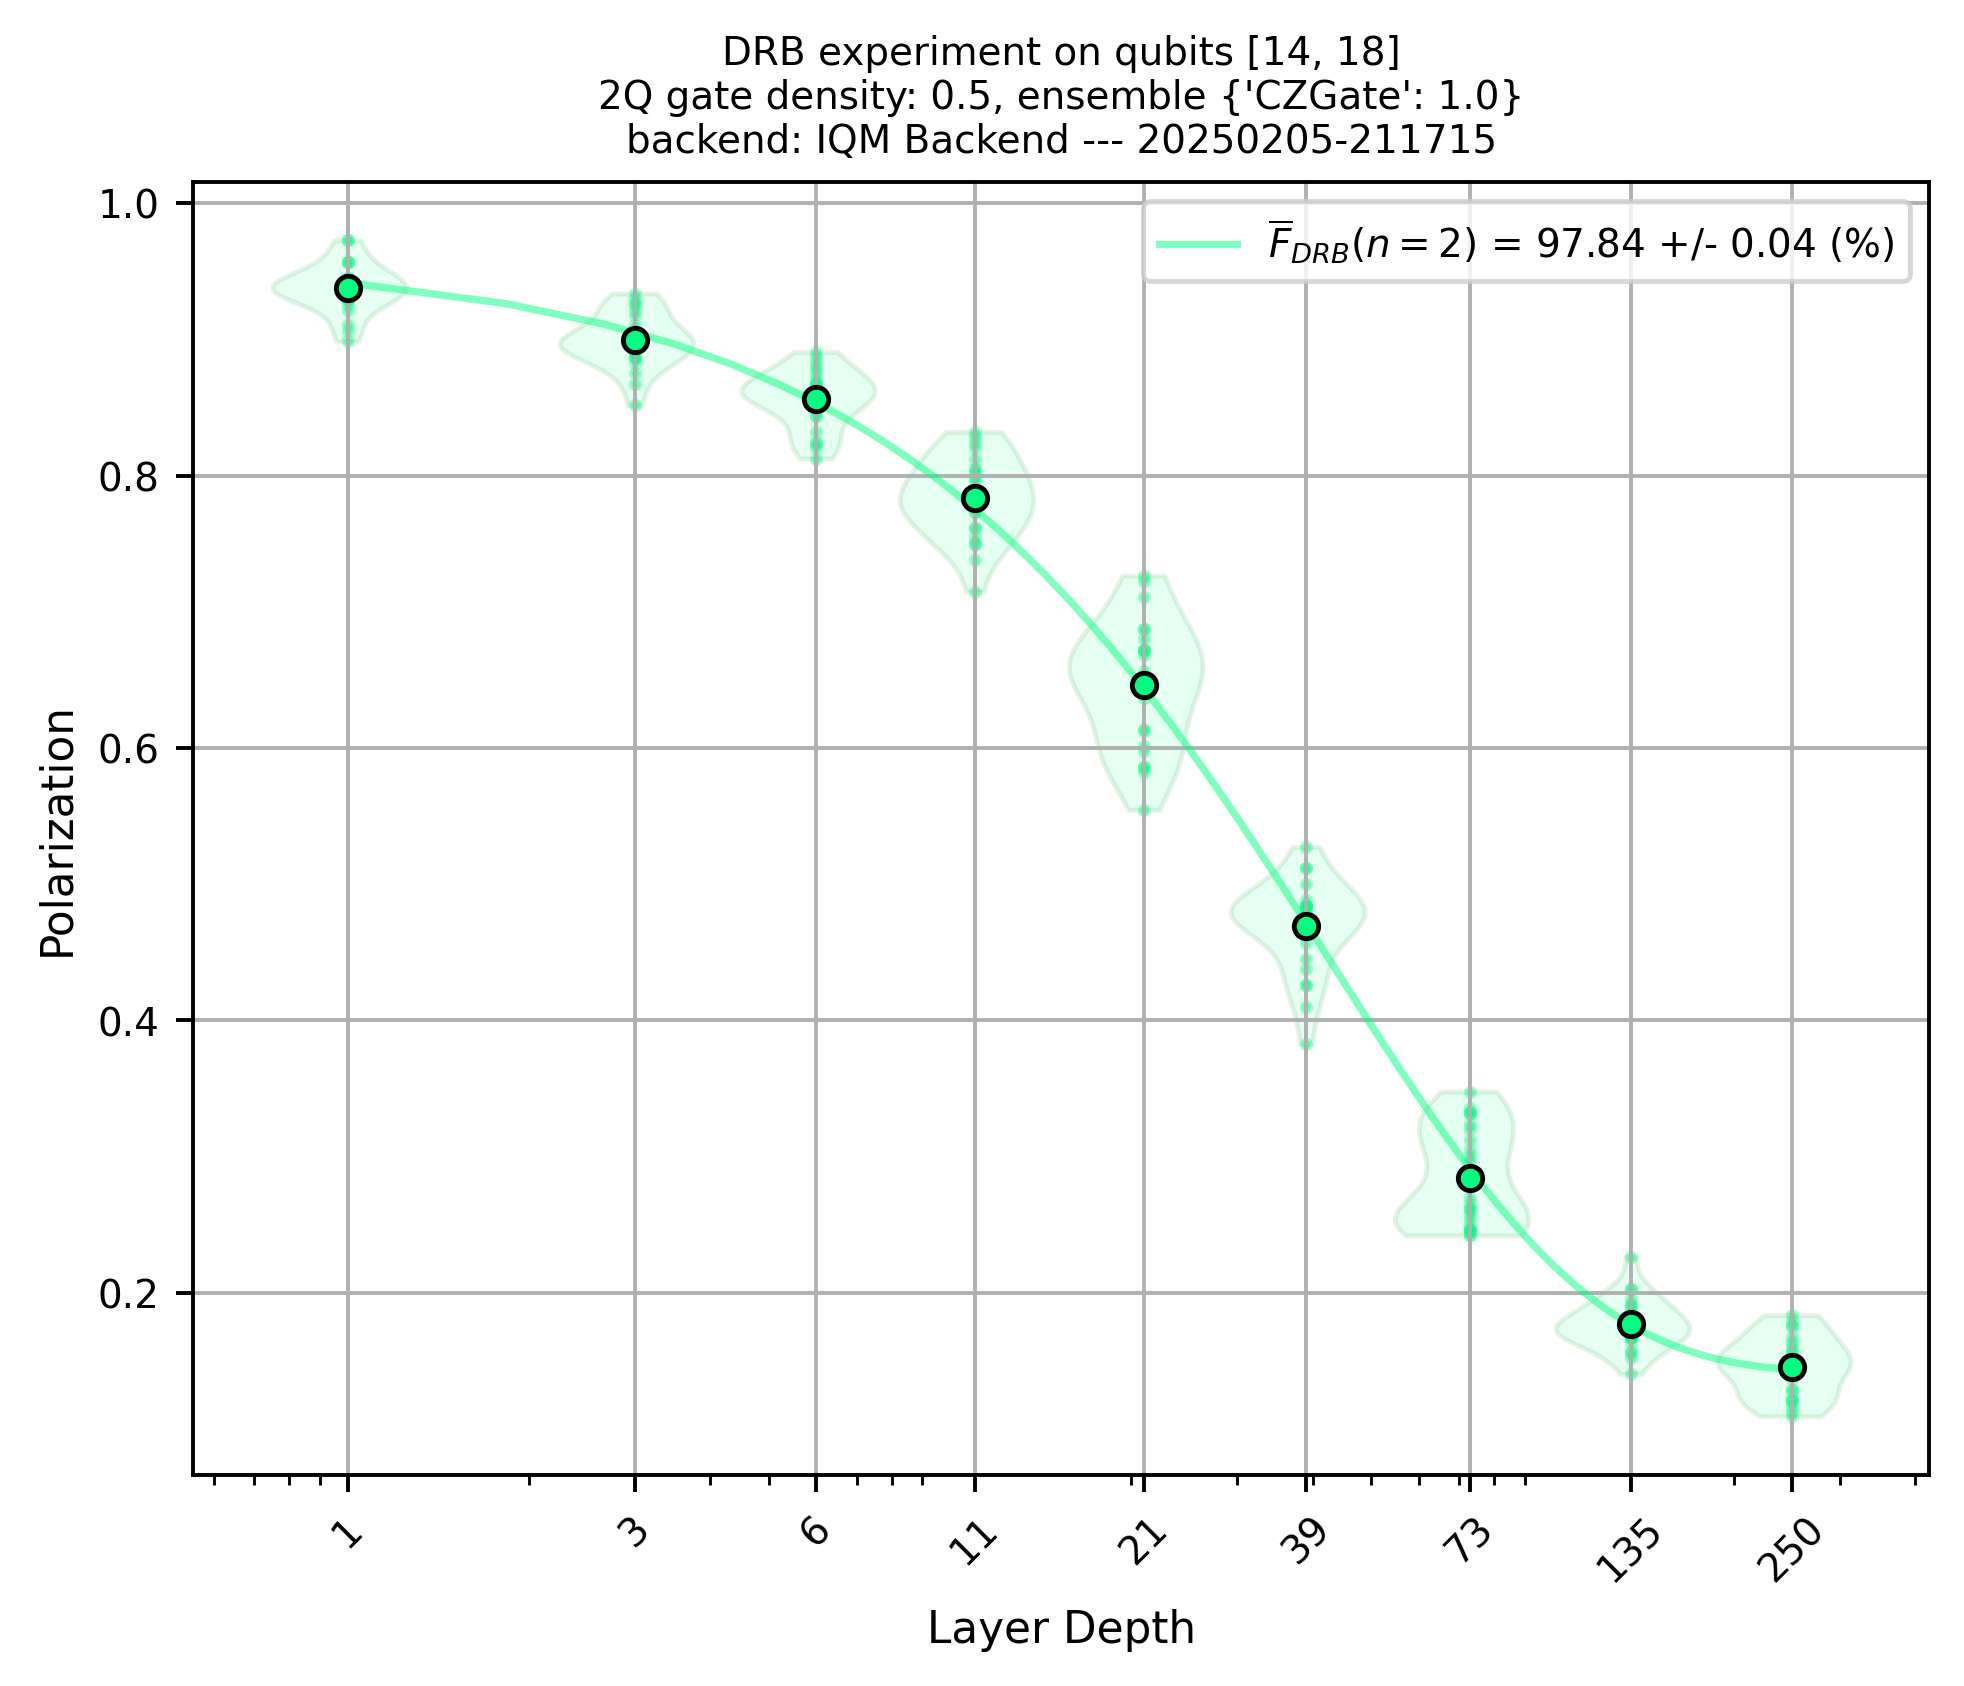

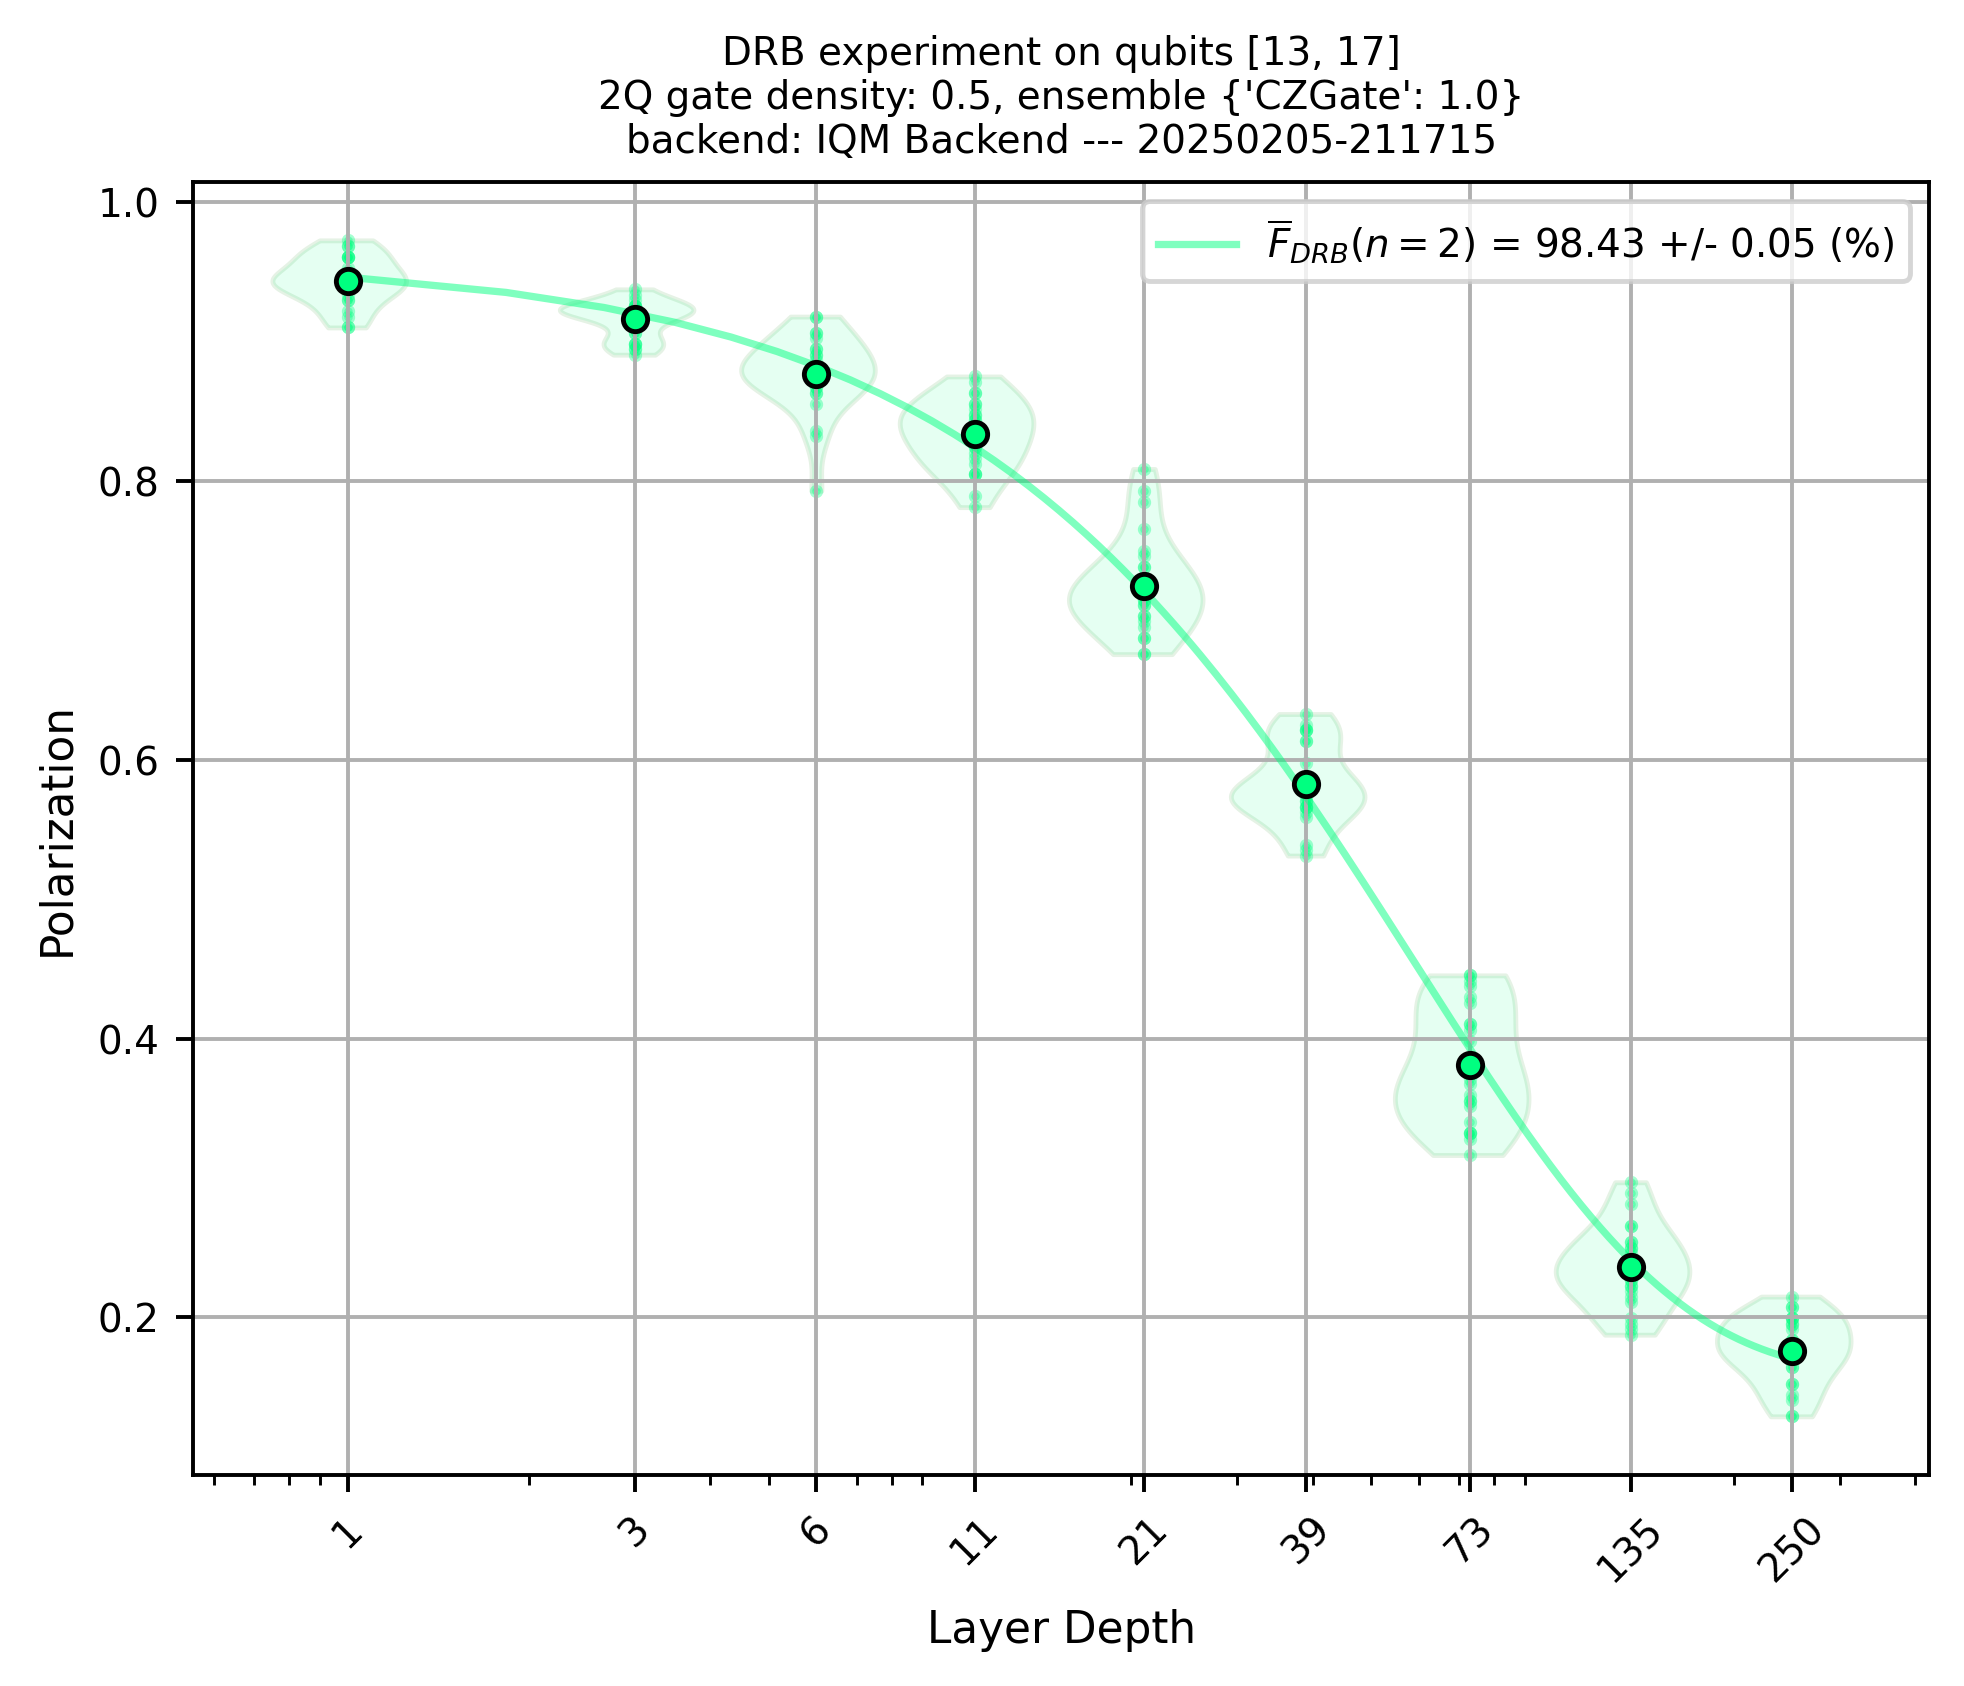

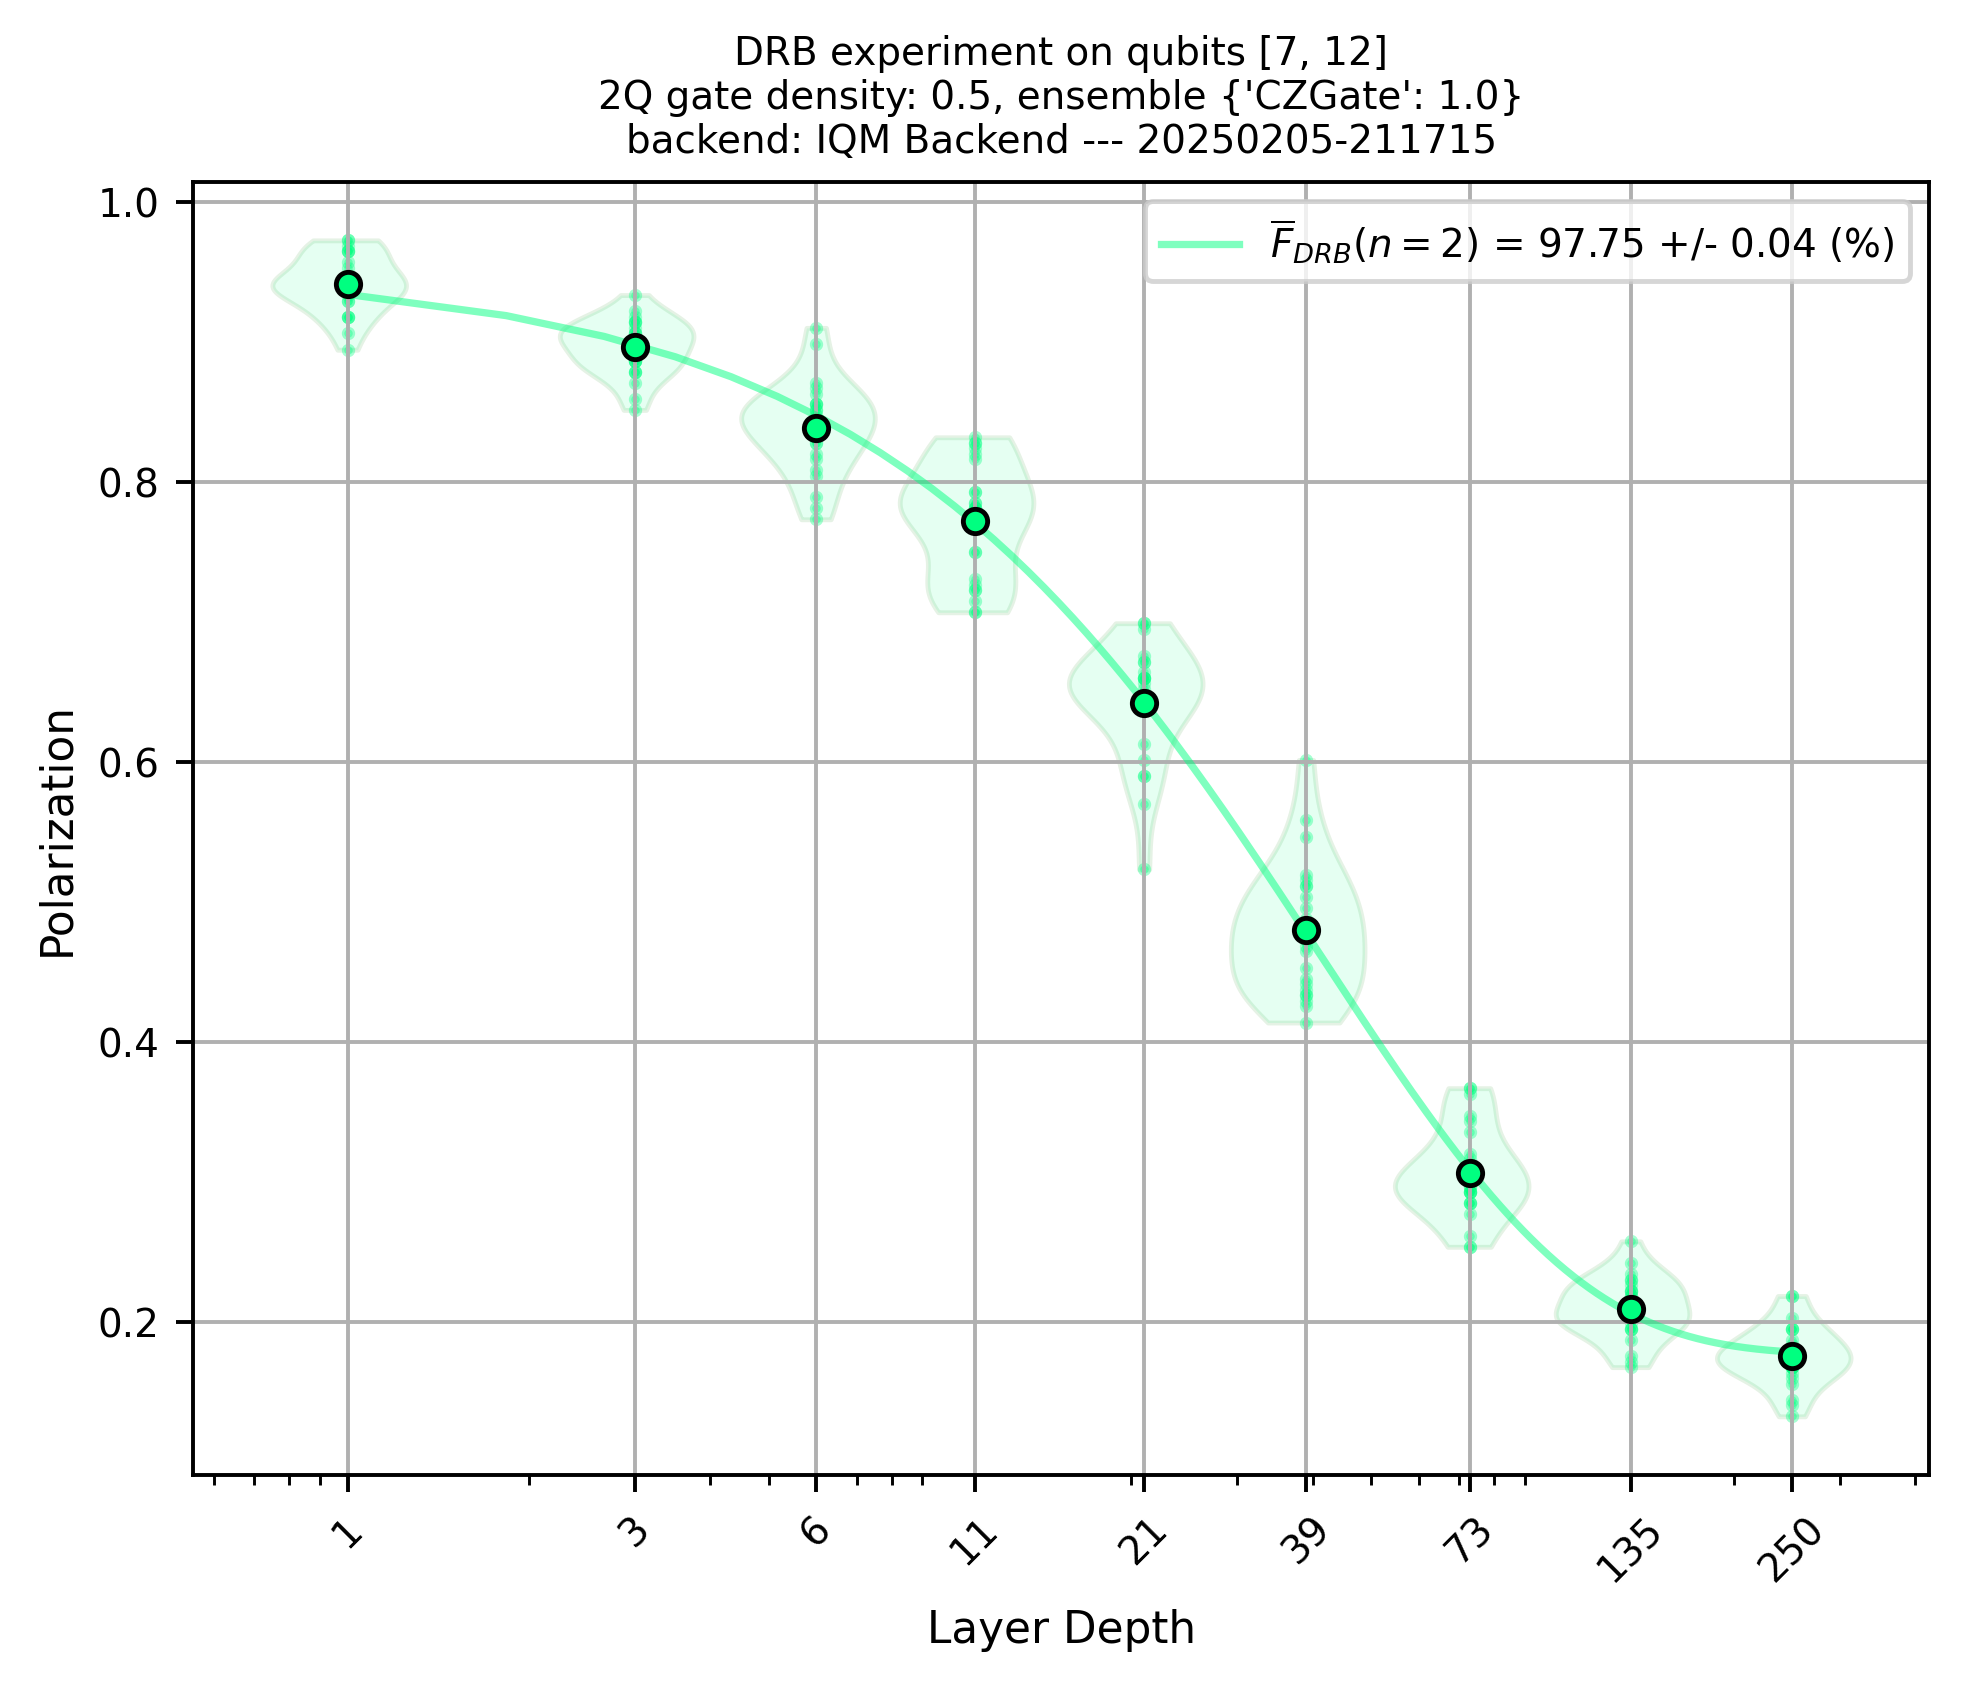

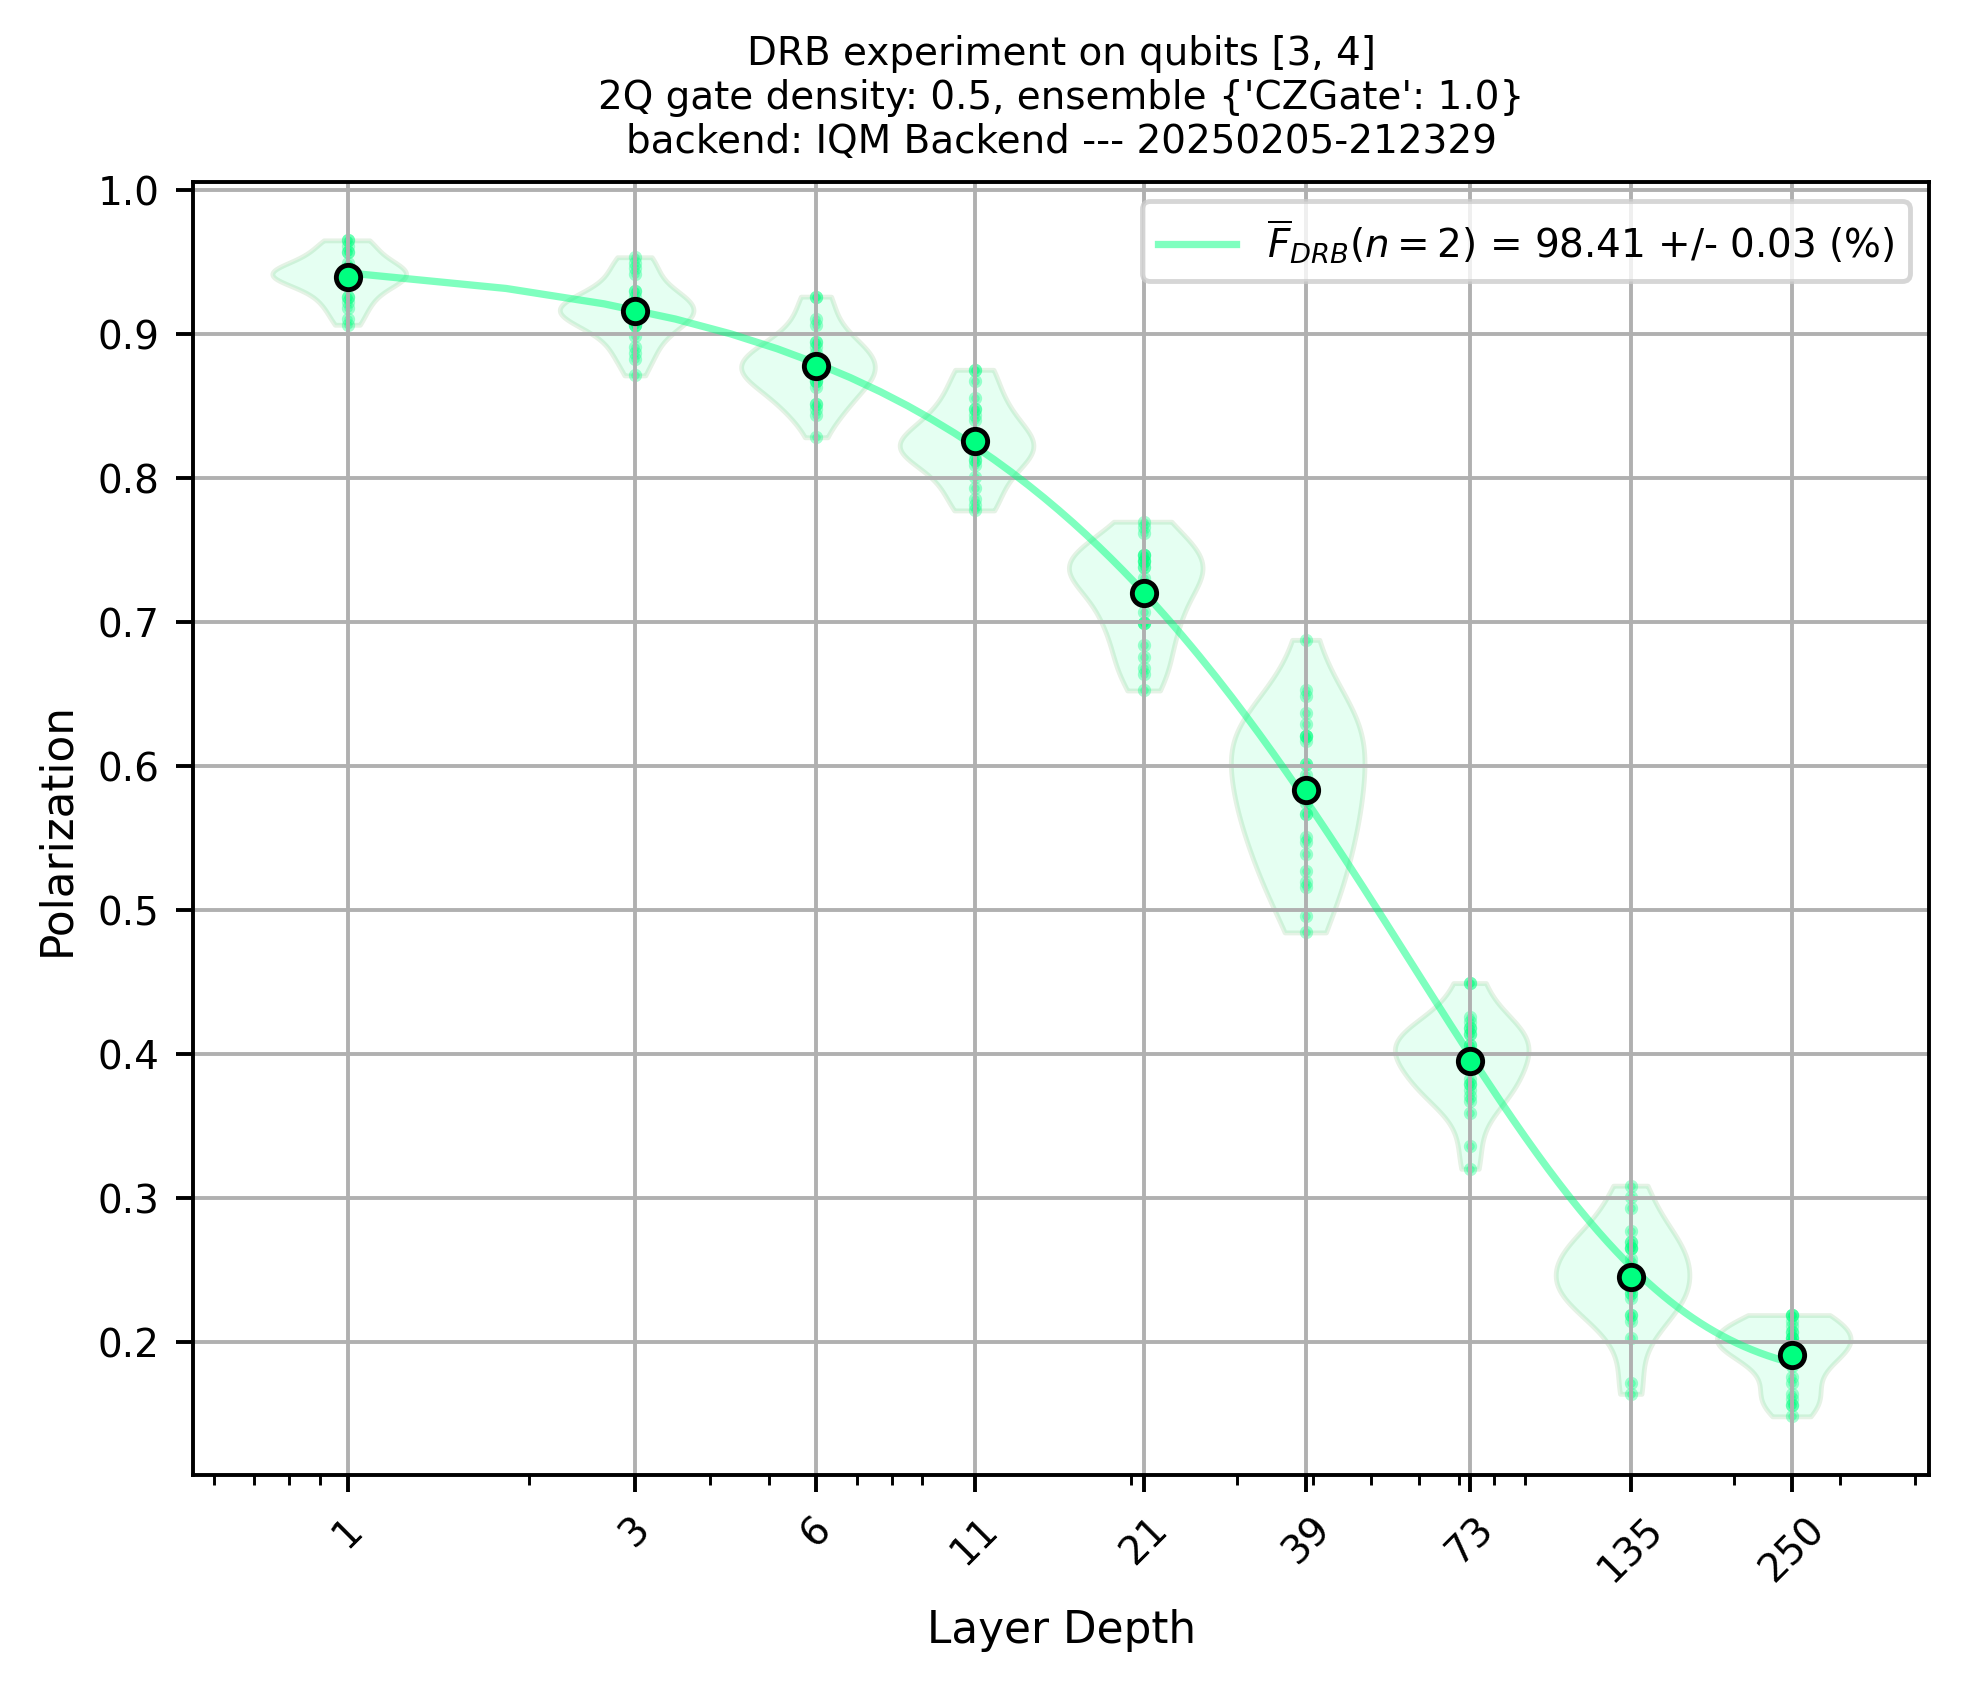

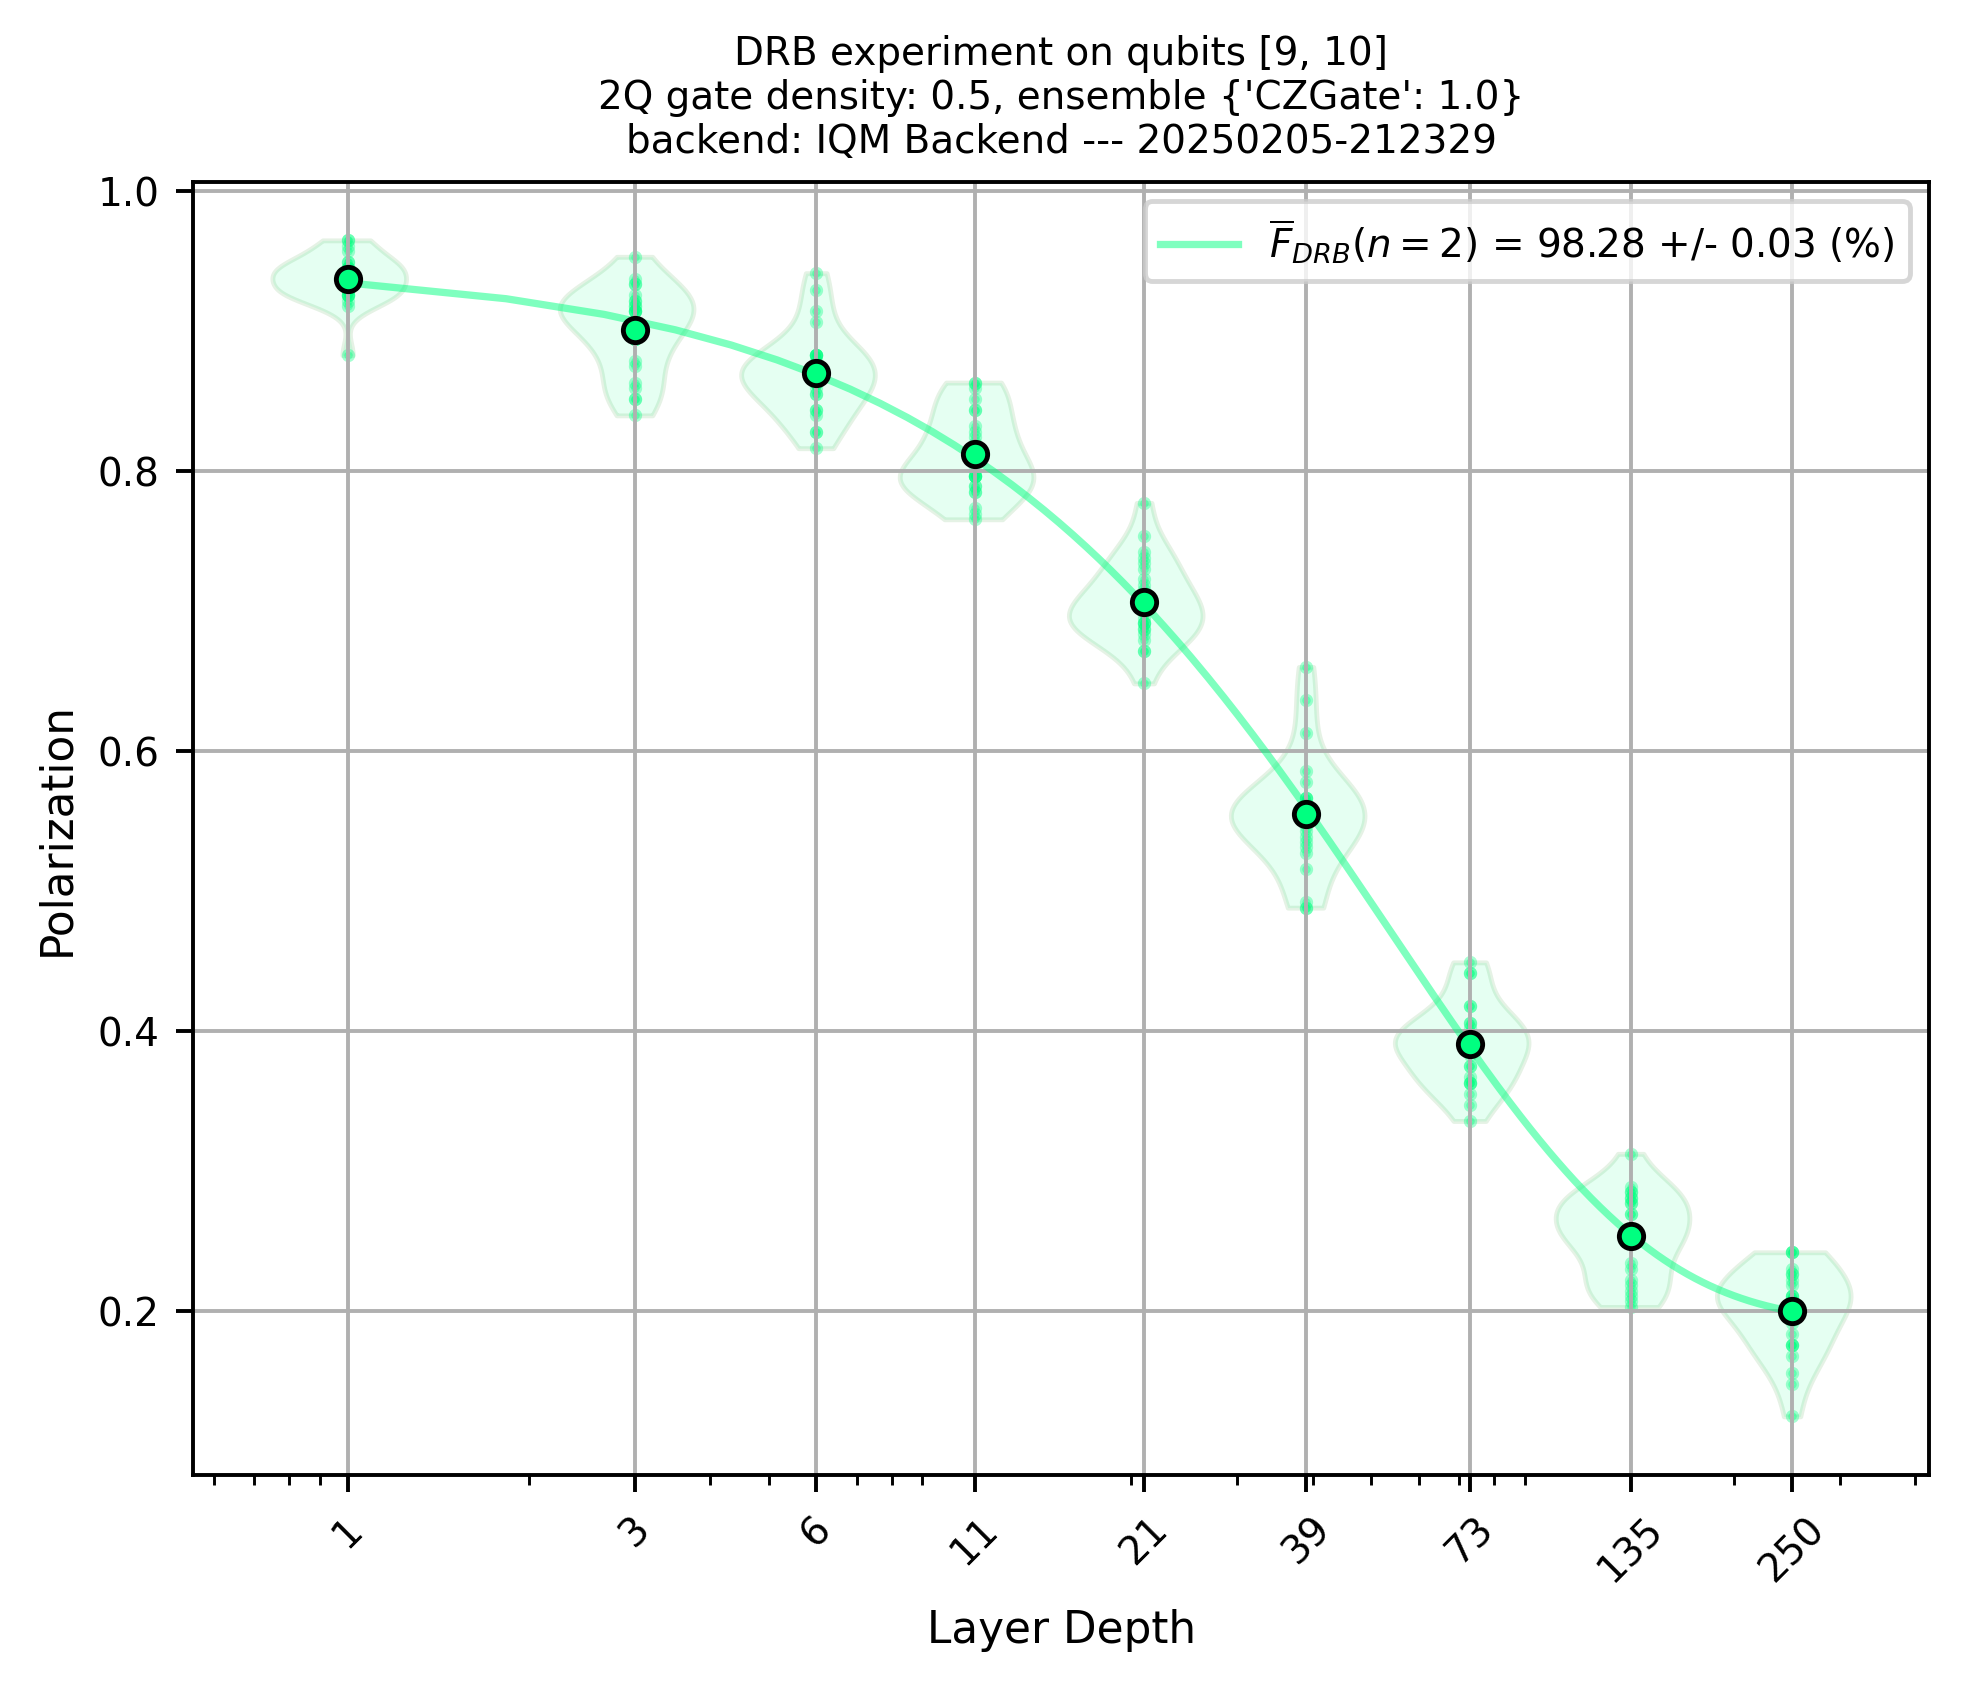

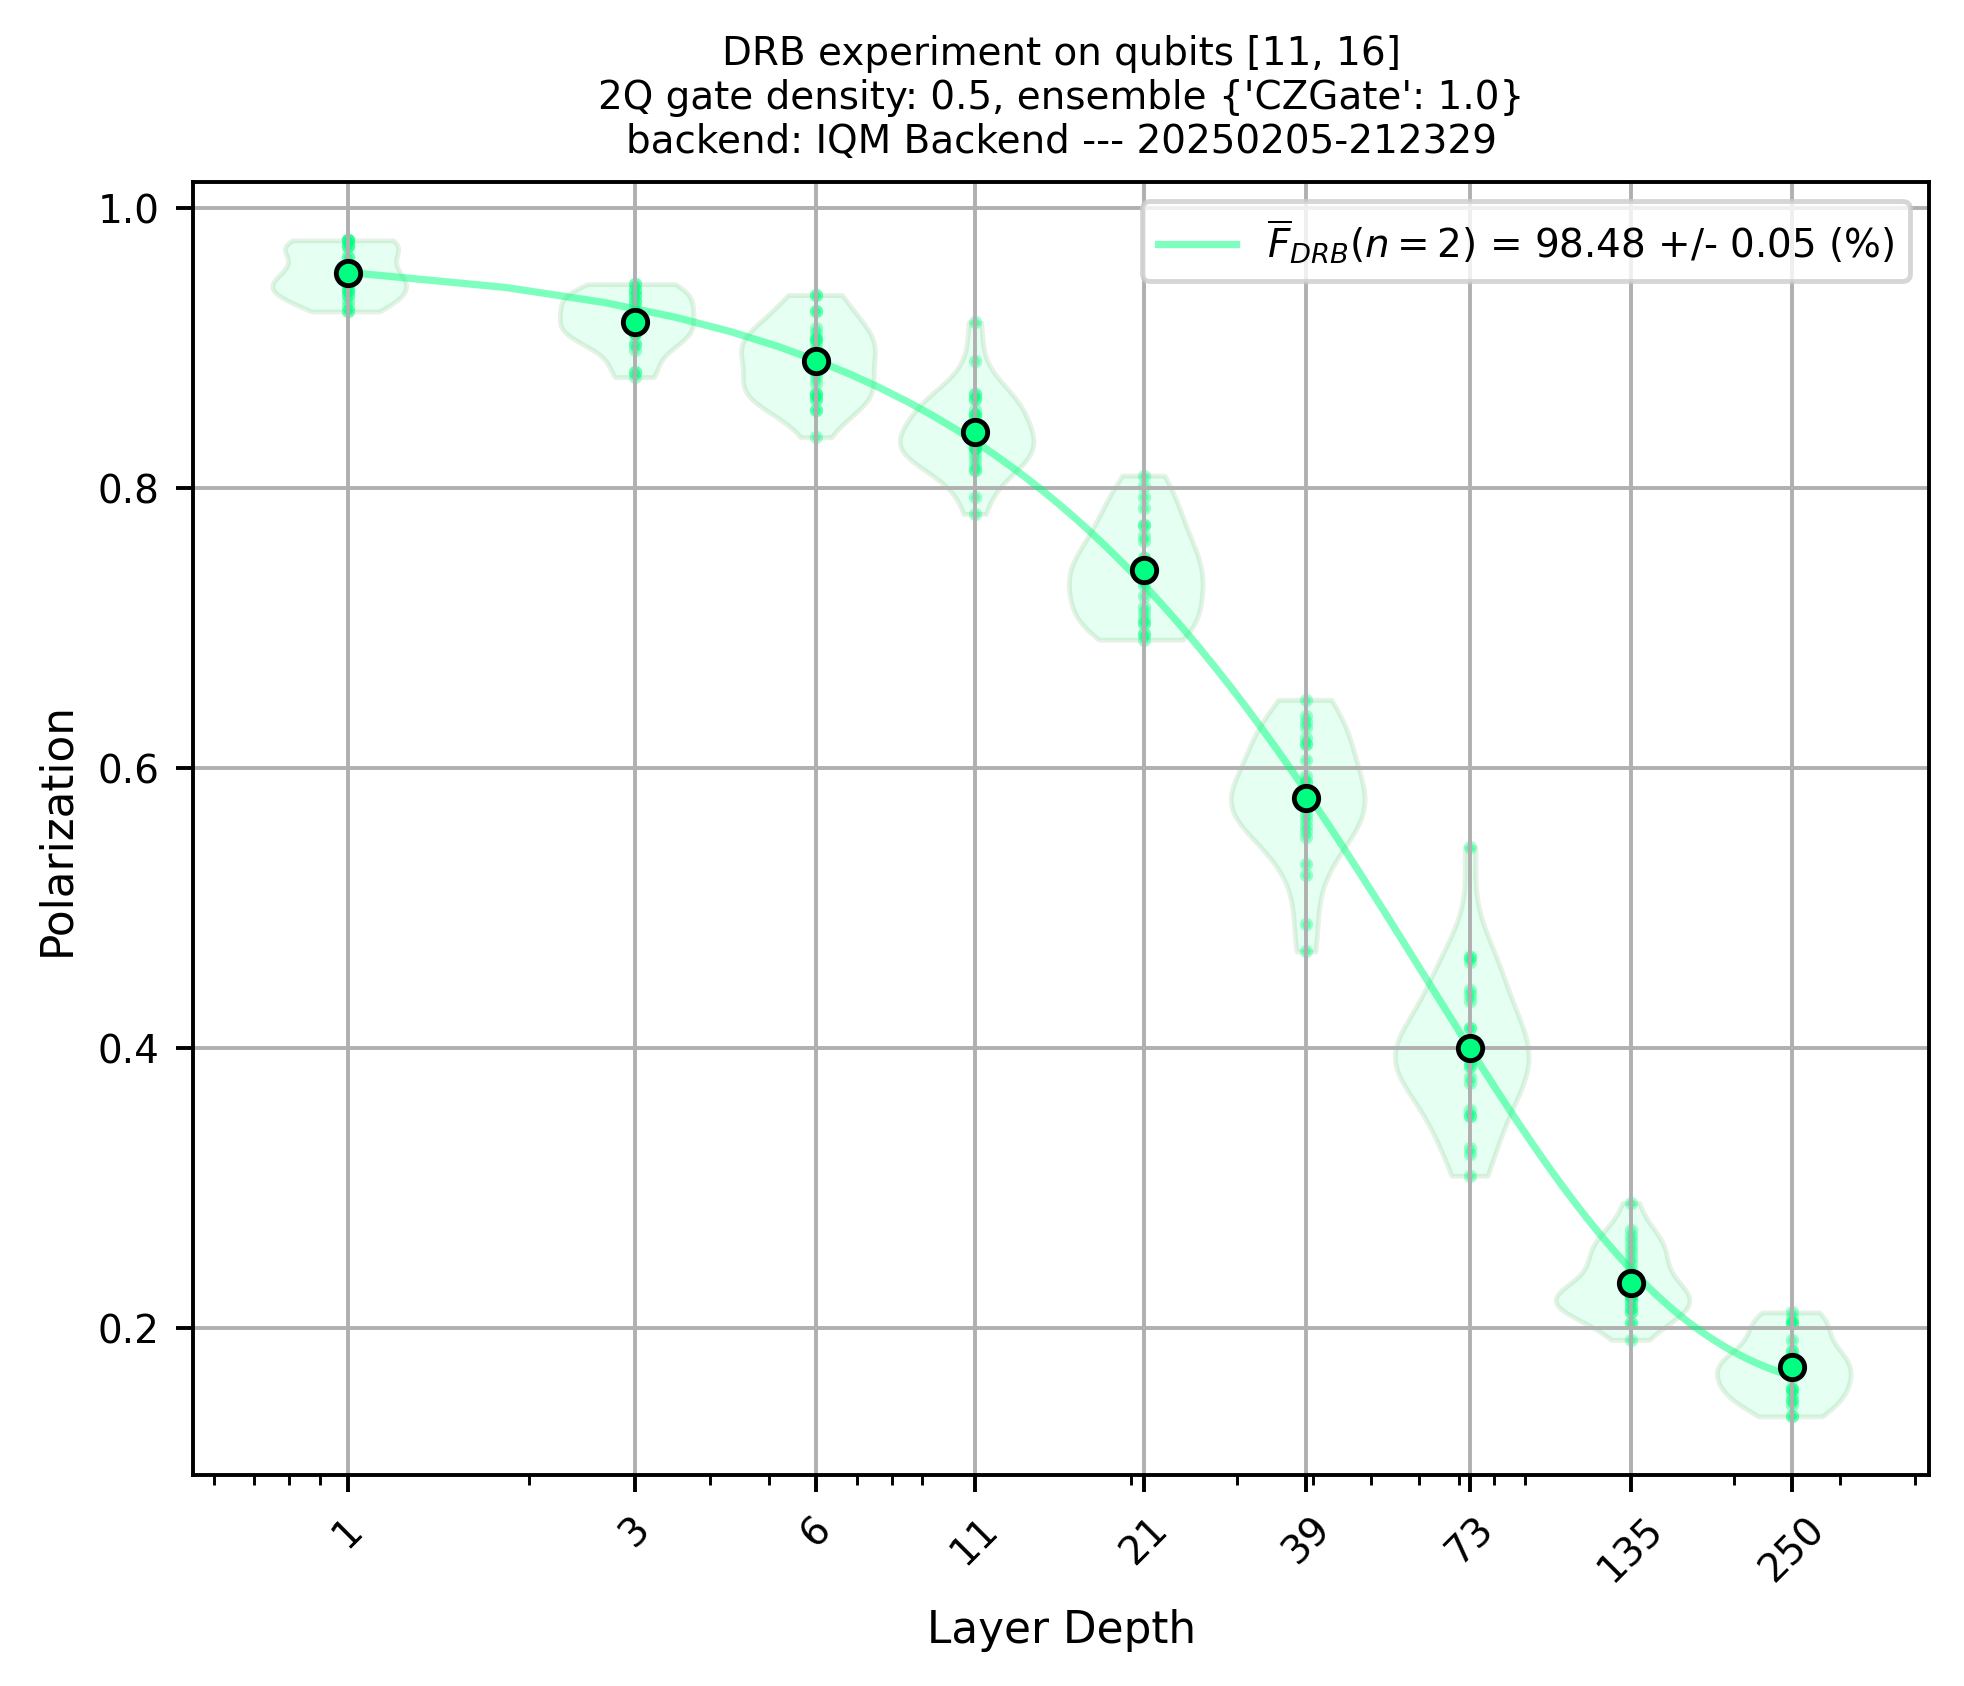

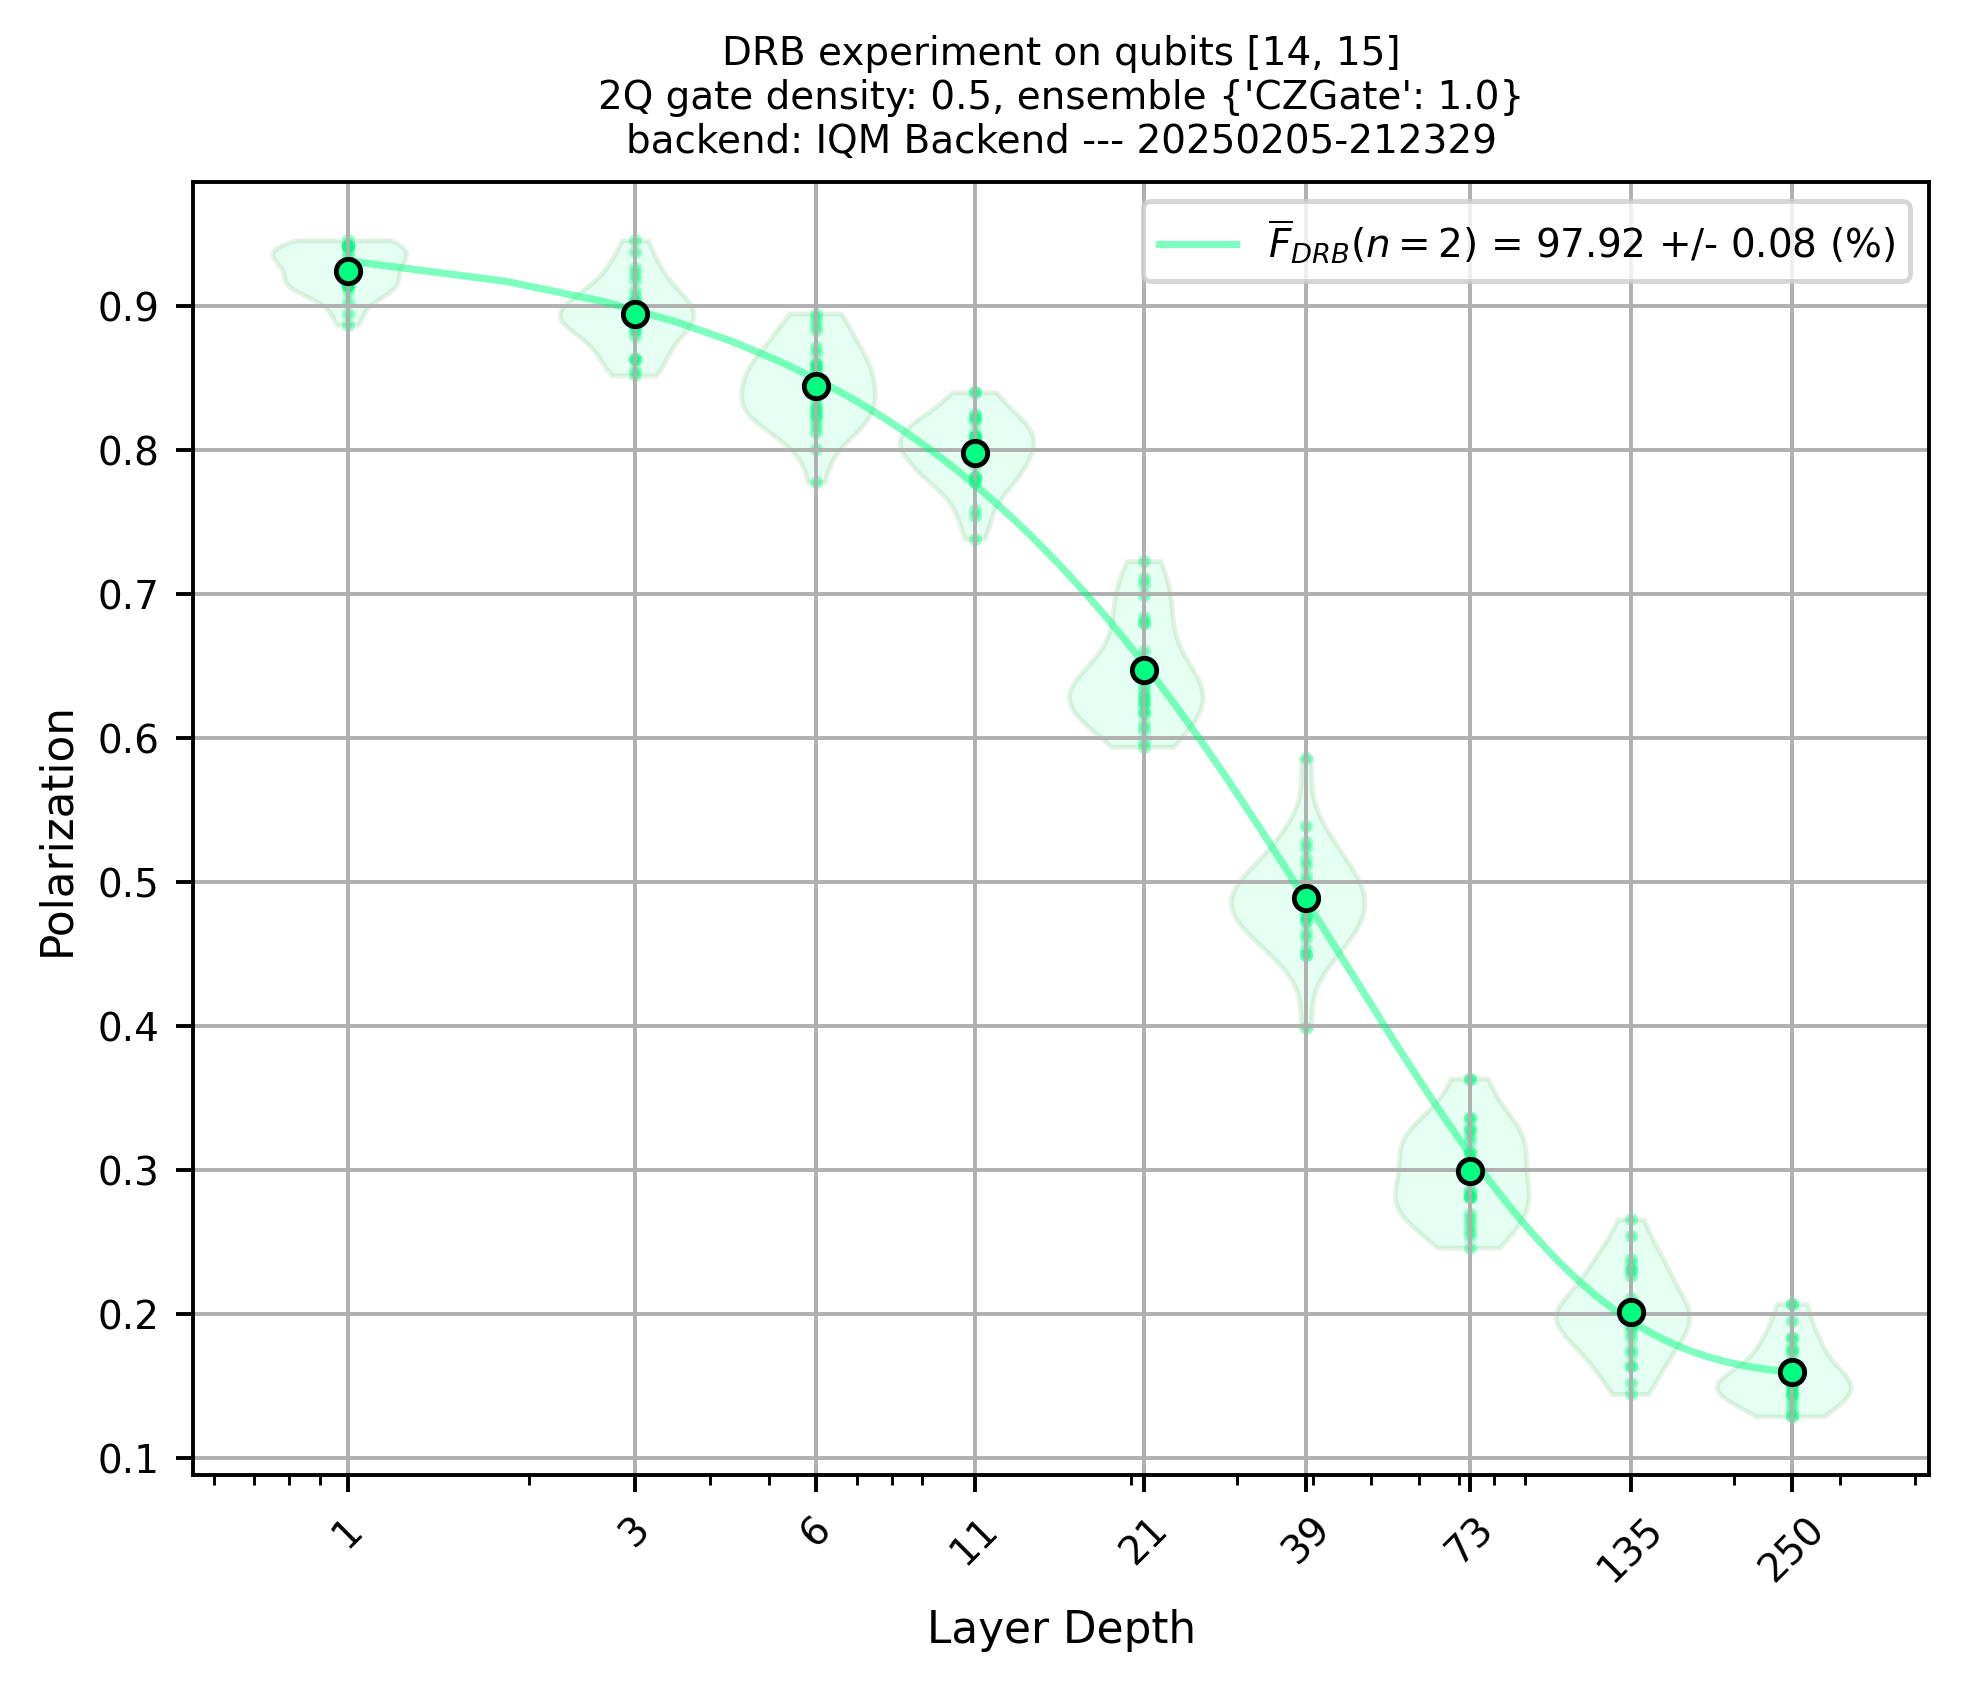

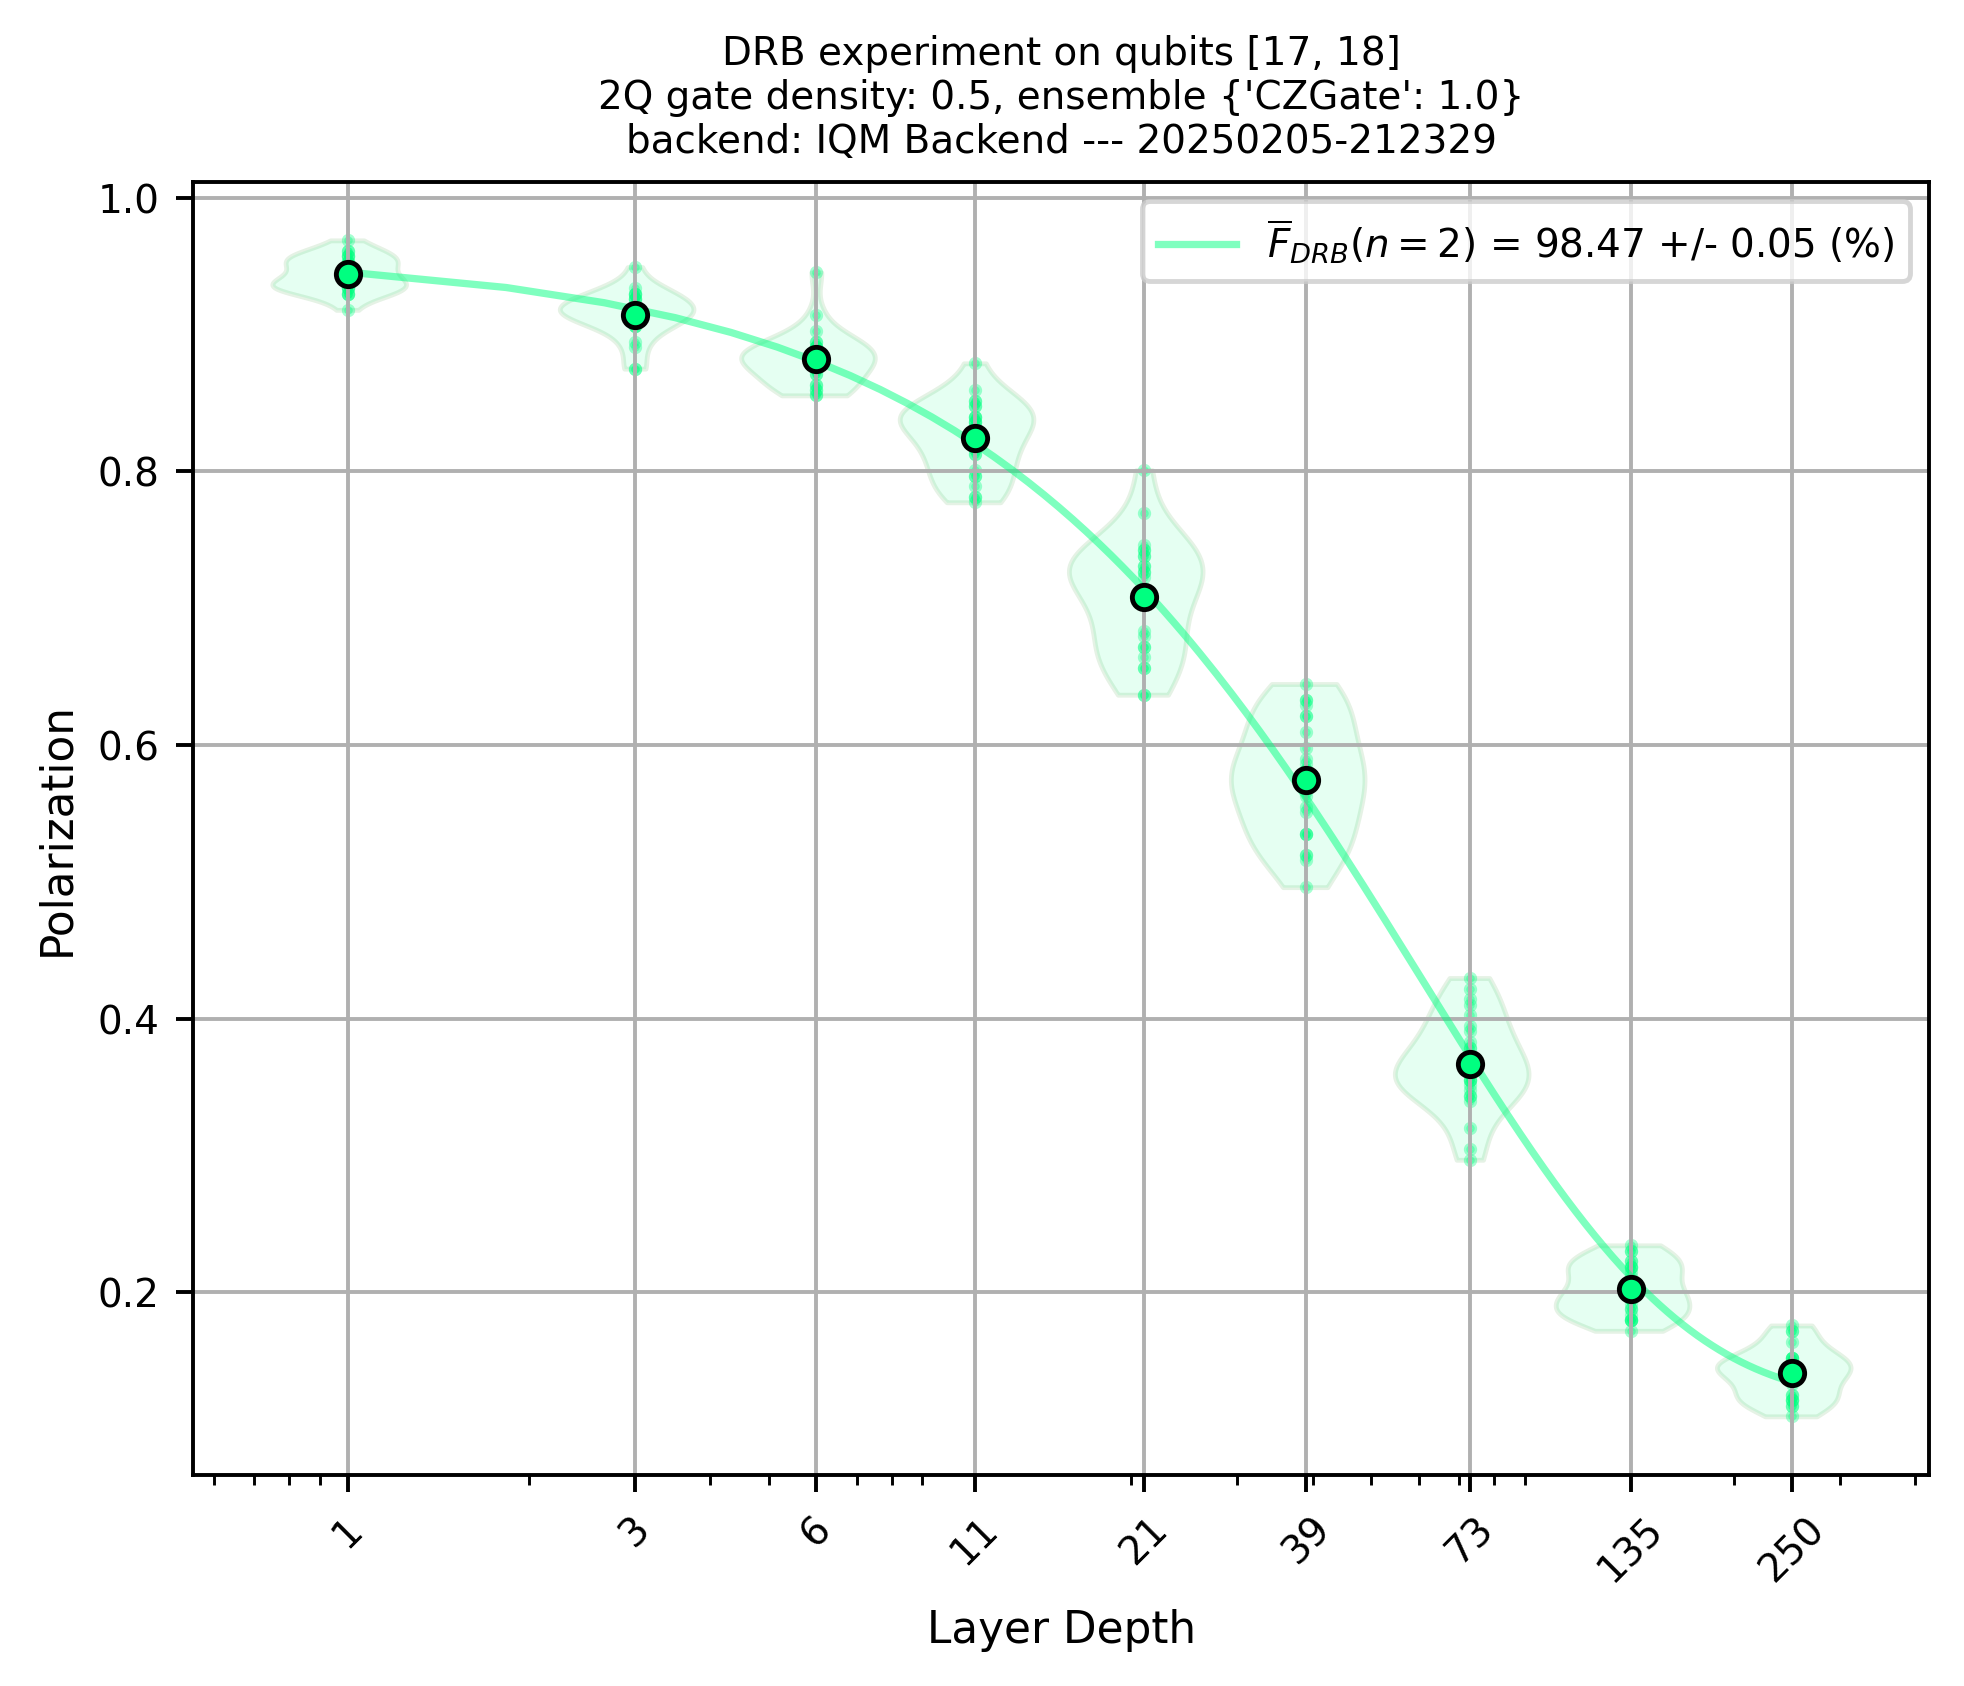

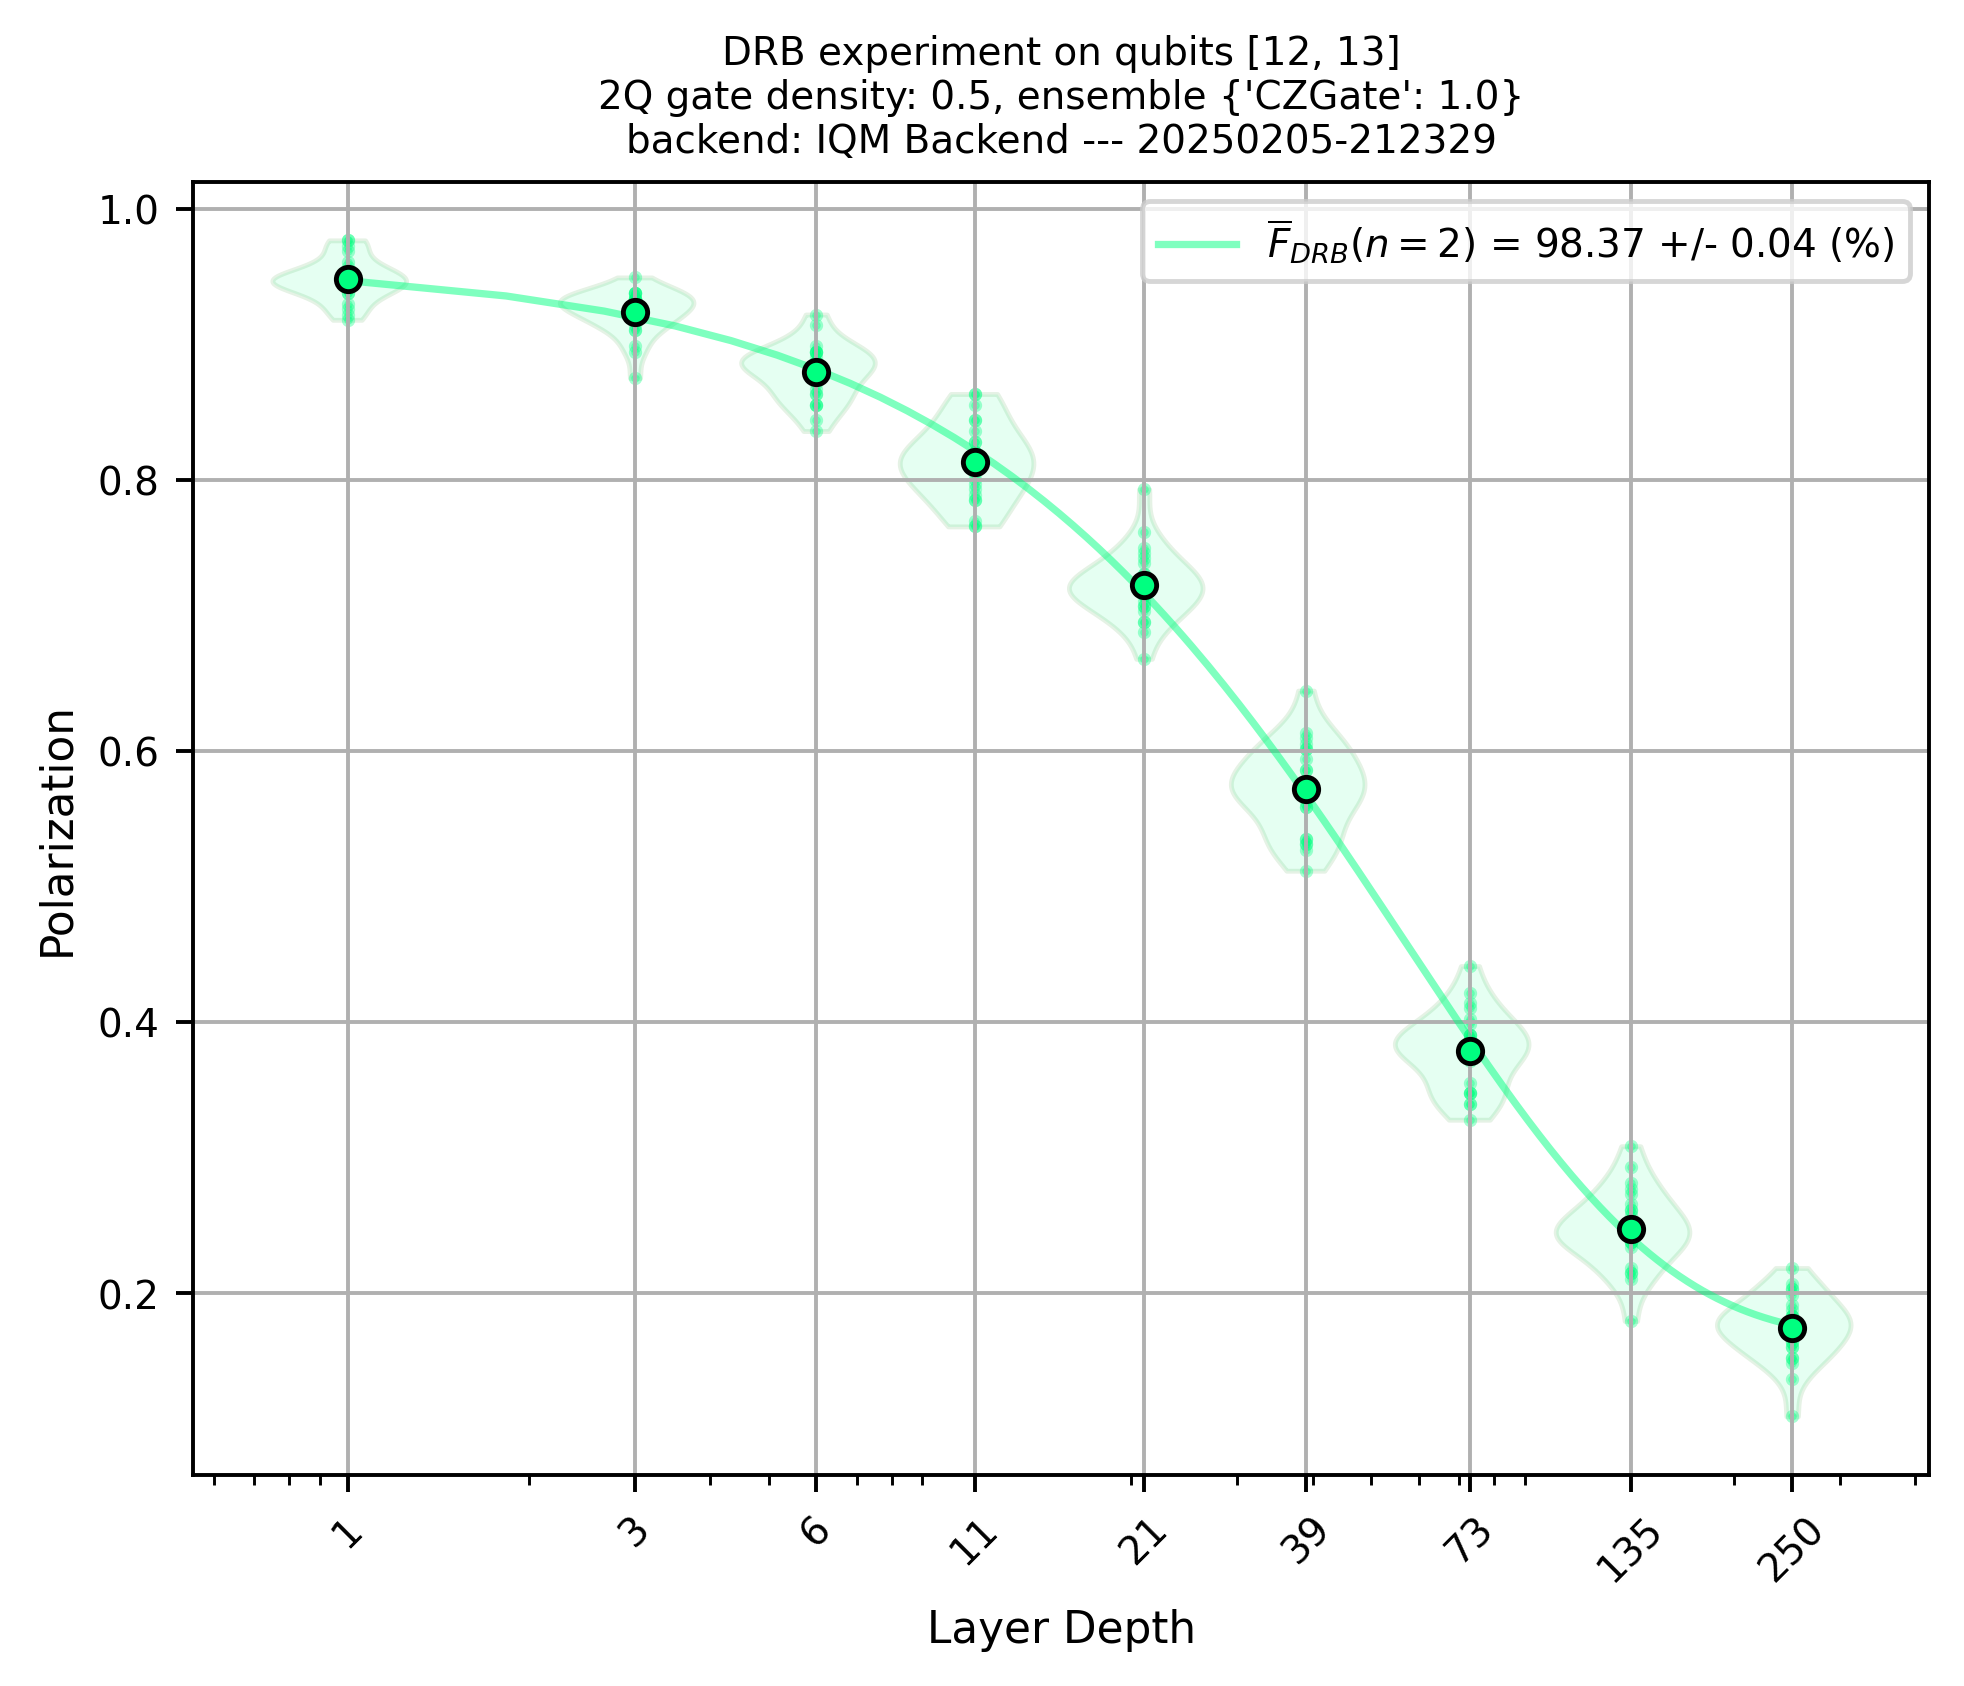

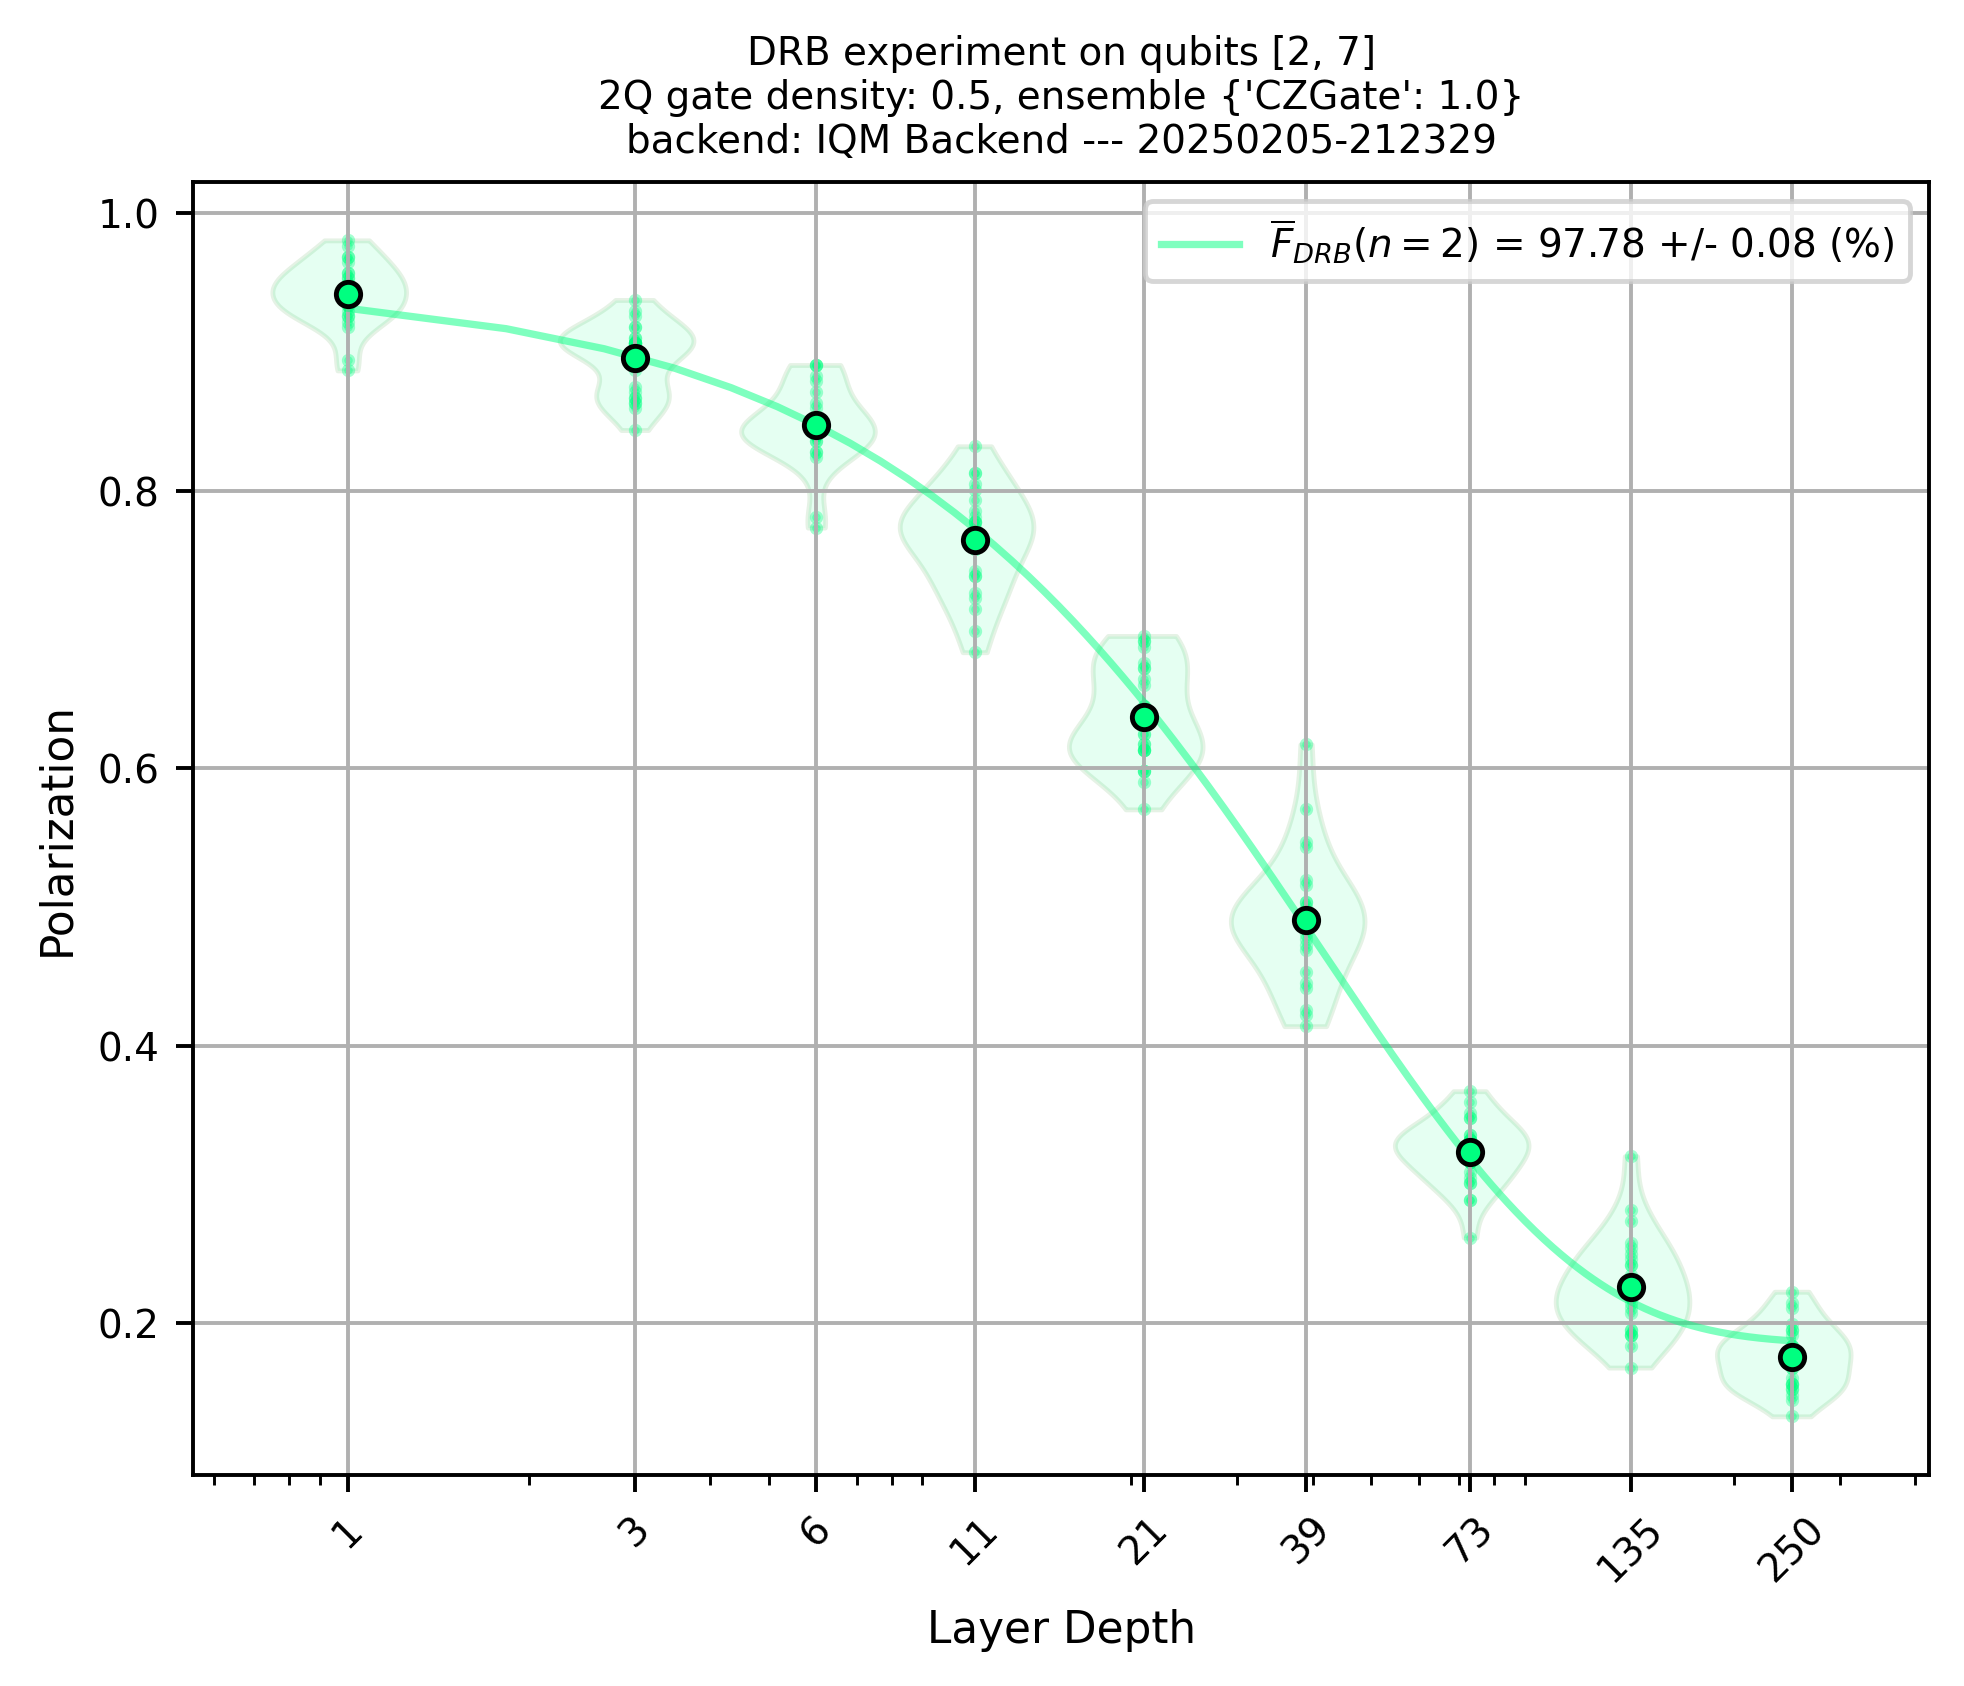

In [31]:
for idx, disjoint in enumerate([disjoint_1,disjoint_2]):
    result_direct_rb[f"disjoint_{idx}"].plot_all()

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 250

In [56]:
backend_object = get_iqm_backend("fakeapollo")
b_graph = backend_object.coupling_map.graph.to_undirected(multigraph=False)
b_egdes, b_nodes = (list(b_graph.edge_list()), list(b_graph.node_indices()))
backend_nx_graph = nx.Graph()
backend_nx_graph.add_nodes_from(b_nodes)
backend_nx_graph.add_edges_from(b_egdes)

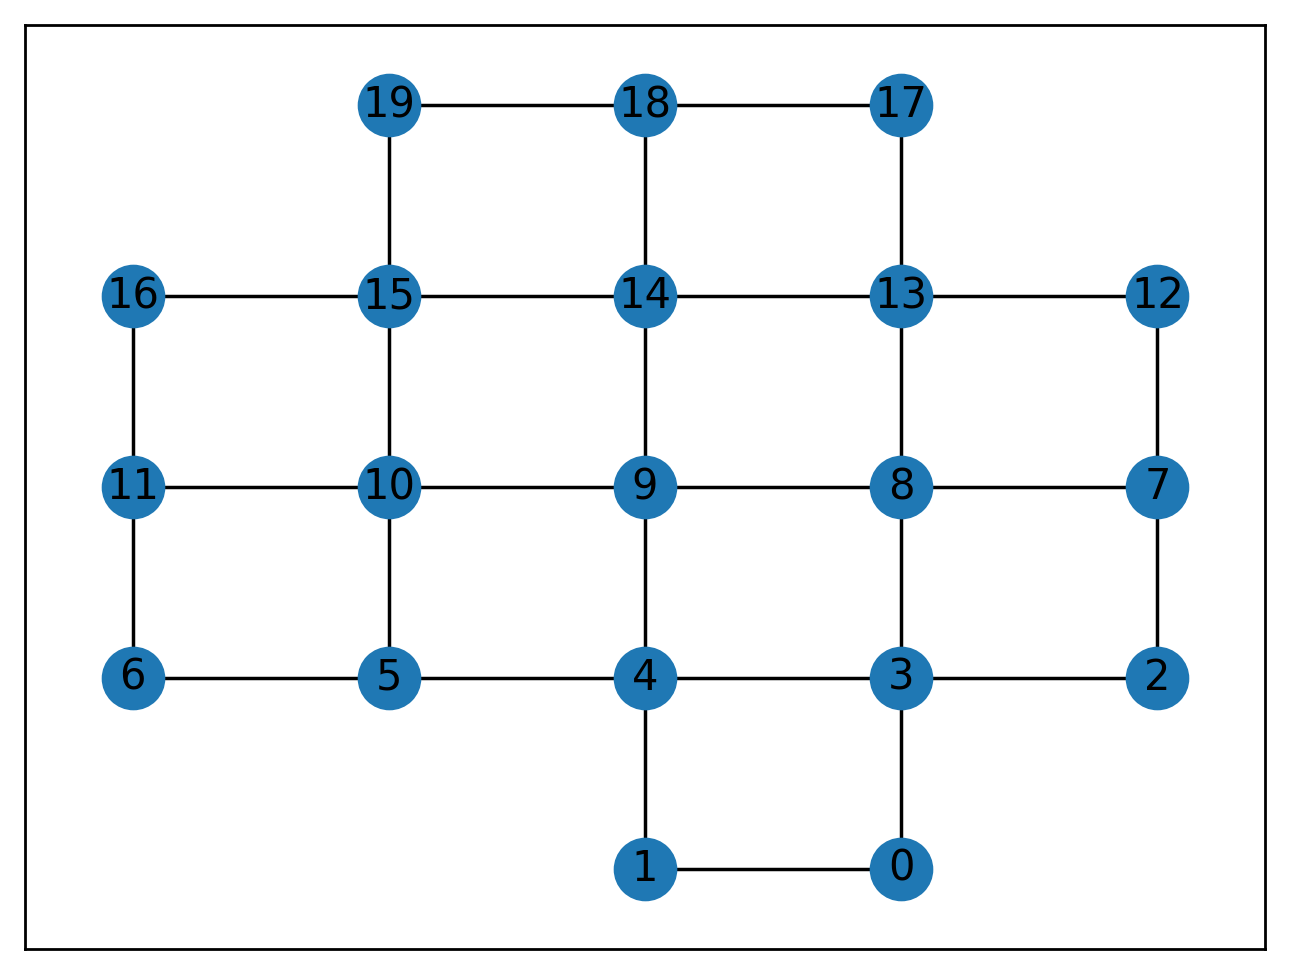

In [58]:
nx.draw_networkx(backend_nx_graph, pos=pos["garnet"])

In [107]:
import random
def random_hamiltonian_path(G: nx.Graph, N: int) -> List[Tuple[int]]:
    """
    Generates a random Hamiltonian path with N vertices from a given NetworkX graph.
    If a Hamiltonian path isn't possible, it returns the longest valid path found.

    Args:
        G (networkx.Graph): The input graph
        N (int): The desired number of vertices in the Hamiltonian path

    Returns:
        list: A list of edges (tuples of nodes) representing the Hamiltonian path, or an empty list if not possible.
    """
    if N > len(G):
        raise ValueError(f"The number of vertices in the Hamiltonian path ({N}) cannot be greater than the number of nodes in the graph ({len(G)})")

    nodes = list(G.nodes)
    random.shuffle(nodes)  # Shuffle nodes to introduce randomness

    for start in nodes:
        path = [start]
        visited = set(path)
        edges = []

        while len(path) < N:
            neighbors = [n for n in G.neighbors(path[-1]) if n not in visited]

            if not neighbors:
                break  # Dead end, stop trying this path

            next_node = random.choice(neighbors)
            edges.append((path[-1], next_node))
            path.append(next_node)
            visited.add(next_node)

        if len(path) == N:
            return edges  # Successfully found a Hamiltonian path of length N

    return []  # No valid path found

In [123]:
def rx_to_nx_graph(backend_arg: str | IQMBackendBase) -> nx.Graph:
    """Convert the Rustworkx graph returned by a backend to a Networkx graph.

    Args:

    Returns:

    """
    if isinstance(backend_arg, str):
        backend = get_iqm_backend(backend_arg)
    else:
        backend = backend_arg

    # Generate a Networkx graph
    graph_backend = backend.coupling_map.graph.to_undirected(multigraph=False)
    backend_egdes, backend_nodes = (list(graph_backend.edge_list()), list(graph_backend.node_indices()))
    backend_nx_graph = nx.Graph()
    backend_nx_graph.add_nodes_from(backend_nodes)
    backend_nx_graph.add_edges_from(backend_egdes)

    return backend_nx_graph

In [140]:
import requests

def evaluate_hamiltonian_paths(N: int, path_samples: int, backend_arg: str | IQMBackendBase, resonance_name: str, token: str) -> Dict[int, List[Tuple[int]]]:
    """

    Args:

    Returns:

    """
    if isinstance(backend_arg, str):
        backend = get_iqm_backend(backend_arg)
    else:
        backend = backend_arg

    backend_nx_graph = rx_to_nx_graph(backend_arg)

    all_paths = []
    sample_counter = 0
    max_tries = 10
    tries = 0
    while sample_counter < path_samples and tries < max_tries:
        h_path = random_hamiltonian_path(backend_nx_graph, N)
        if not h_path:
            tries += 1
            continue
        else:
            all_paths.append(h_path)
            tries = 0
            sample_counter += 1
    if tries == max_tries-1:
        raise Exception(f"Max tries to generate a Hamiltonian path with {N} vertices reached - try with less vertices!")

    # Get scores for all paths
    # Retrieve fidelity data
    two_qubit_fidelity = {}

    url = f"https://api.resonance.meetiqm.com/quantum-computers/v1/{resonance_name}/calibrations"
    headers = {"Accept": "application/json", "Authorization": f"Bearer {token}"}
    r = requests.get(url, headers=headers, timeout=5)
    calibration = r.json()

    edge_dictionary = {}
    for iq in calibration["calibrations"][0]["metrics"][0]["metrics"]:
        temp = list(iq.values())
        two_qubit_fidelity[str(temp[0])] = temp[1]
        two_qubit_fidelity[str([temp[0][1], temp[0][0]])] = temp[1]
        edge_dictionary[str([temp[0][1], temp[0][0]])] = (backend.qubit_name_to_index(temp[0][1]), backend.qubit_name_to_index(temp[0][0]))

    # Rate all the paths
    path_costs = {} # keys are costs, values are edge paths
    for h_path in all_paths:
        total_cost = 1
        for edge in h_path:
            total_cost *= two_qubit_fidelity[str([backend.index_to_qubit_name(edge[0]),backend.index_to_qubit_name(edge[1])])]
        path_costs[total_cost] = h_path

    return path_costs

In [143]:
h_path_costs = evaluate_hamiltonian_paths(19, 10, "garnet", "garnet", token)

In [144]:
for cost in sorted(h_path_costs.keys(), reverse=True):
    print(f"{cost}: {h_path_costs[cost]}")

0.8750968998659485: [(12, 13), (13, 17), (17, 18), (18, 19), (19, 15), (15, 16), (16, 11), (11, 6), (6, 5), (5, 10), (10, 9), (9, 8), (8, 7), (7, 2), (2, 3), (3, 0), (0, 1), (1, 4)]
0.870195047594588: [(16, 11), (11, 6), (6, 5), (5, 10), (10, 15), (15, 14), (14, 18), (18, 17), (17, 13), (13, 8), (8, 9), (9, 4), (4, 1), (1, 0), (0, 3), (3, 2), (2, 7), (7, 12)]
0.8697472097475273: [(12, 7), (7, 2), (2, 3), (3, 0), (0, 1), (1, 4), (4, 9), (9, 8), (8, 13), (13, 17), (17, 18), (18, 14), (14, 15), (15, 16), (16, 11), (11, 6), (6, 5), (5, 10)]
0.8686516045339651: [(14, 15), (15, 19), (19, 18), (18, 17), (17, 13), (13, 8), (8, 7), (7, 2), (2, 3), (3, 0), (0, 1), (1, 4), (4, 9), (9, 10), (10, 5), (5, 6), (6, 11), (11, 16)]
0.8672701802432702: [(17, 18), (18, 14), (14, 13), (13, 12), (12, 7), (7, 8), (8, 3), (3, 0), (0, 1), (1, 4), (4, 9), (9, 10), (10, 5), (5, 6), (6, 11), (11, 16), (16, 15), (15, 19)]
0.8670172273278165: [(8, 9), (9, 4), (4, 1), (1, 0), (0, 3), (3, 2), (2, 7), (7, 12), (12, 13

In [145]:
max_cost_path = h_path_costs[max(h_path_costs.keys())]
print(max_cost_path)

[(12, 13), (13, 17), (17, 18), (18, 19), (19, 15), (15, 16), (16, 11), (11, 6), (6, 5), (5, 10), (10, 9), (9, 8), (8, 7), (7, 2), (2, 3), (3, 0), (0, 1), (1, 4)]


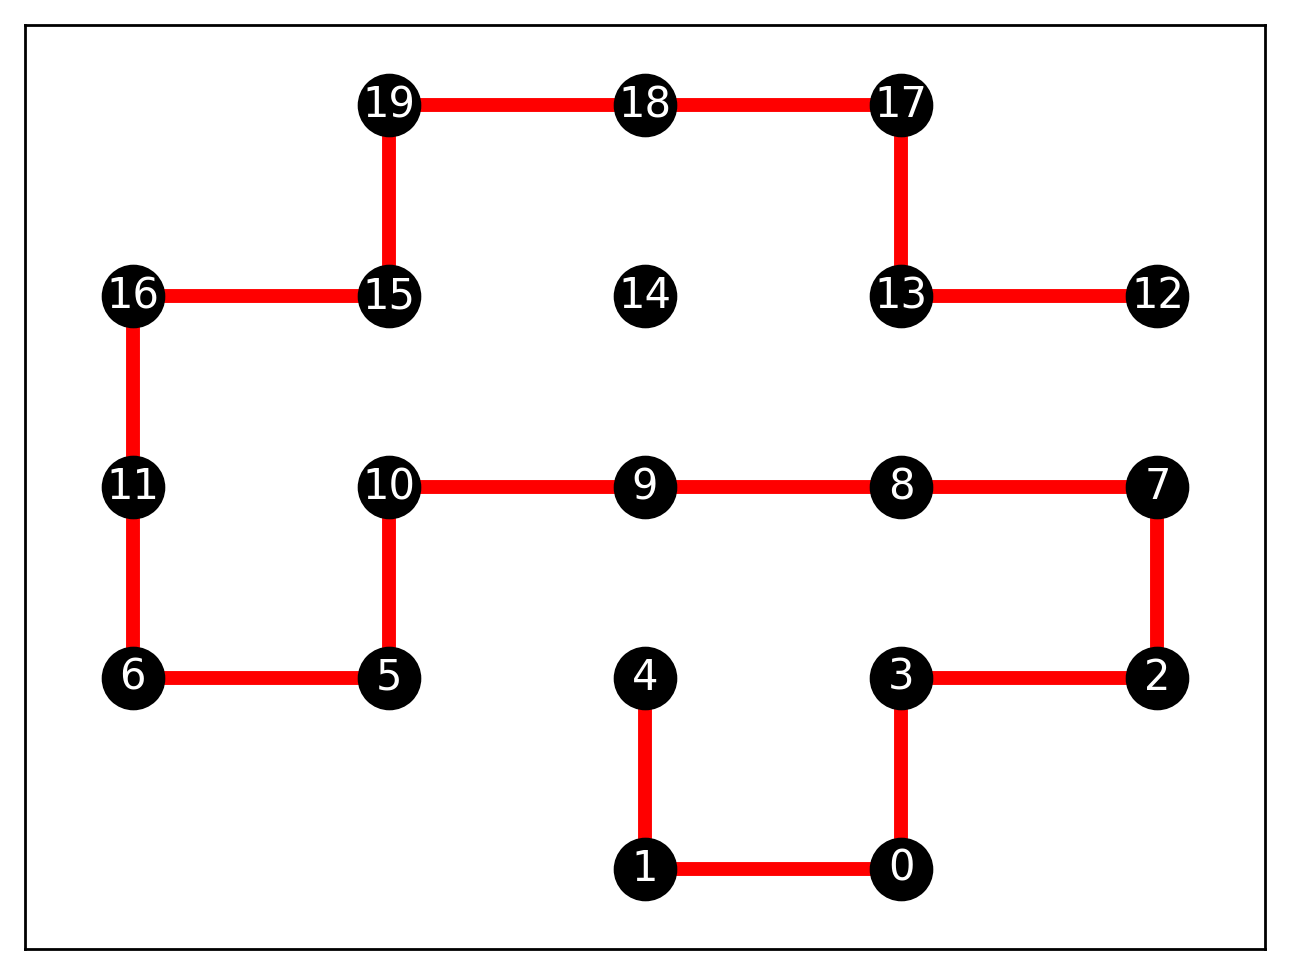

In [146]:
nx.draw_networkx(backend_nx_graph, pos=pos["garnet"], edgelist=max_cost_path, width=4.0, edge_color='r', node_color='k', font_color='w')

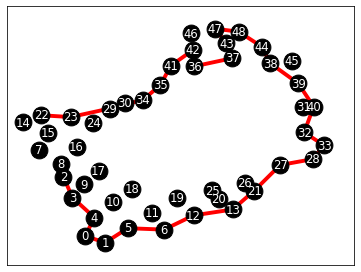

In [168]:
from iqm.qiskit_iqm.iqm_provider import IQMProvider
iqm_url="https://cocos.resonance.meetiqm.com/emerald-fe33b793-44a0-42d6"
#iqm_url="https://cocos.resonance.meetiqm.com/garnet"
provider = IQMProvider(iqm_url)
backend_emerald = provider.get_backend()

h_path_costs_emerald = evaluate_hamiltonian_paths(30, 10, backend_emerald, "emerald-fe33b793-44a0-42d6", token)
max_cost_path_emerald = h_path_costs_emerald[max(h_path_costs_emerald.keys())]

nx.draw_networkx(rx_to_nx_graph(backend_emerald), edgelist=max_cost_path_emerald, width=4.0, edge_color='r', node_color='k', font_color='w')